# Countries - Unsupervised Learning - Market Segmentation

# Description

In [2]:
#An organization is committed to fighting poverty and providing the people of backward countries with basic
#amenities and relief during the time of disasters and natural calamities. After the recent funding programmes,
#they have been able to raise around $ 10 million. Now the CEO of the organization needs to decide how to use
#this money strategically and effectively. The significant issues that come while making this decision are mostly
#related to choosing the countries that are in the direst need of aid.
#Business Goal:
#Our job is to categorise the countries using some socio-economic and health factors that determine the overall
#development of the country. Then you need to suggest the countries which the CEO needs to focus on the
#most.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
##We have to cluster the countries

# Understanding the Data

In [7]:
df = pd.read_csv('Country-data.csv')

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
df.shape  ##Rows, columns

(167, 10)

In [10]:
df.dtypes  ##Categories of variables(qualitative and quantitative)

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

# Statistical Summary

In [12]:
df.describe()   ##Summary for quantitative variables

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [13]:
##We see the mean, min, max, etc. values for variables such as child mortality, life expectancy, etc.

In [15]:
df.describe(include=object)

,country
count,167
unique,167
top,Niger
freq,1


In [16]:
df['country'].value_counts(normalize=True)*100

Niger                       0.598802
Namibia                     0.598802
Brazil                      0.598802
Turkmenistan                0.598802
Zambia                      0.598802
                              ...   
Central African Republic    0.598802
Colombia                    0.598802
Kiribati                    0.598802
Fiji                        0.598802
Australia                   0.598802
Name: country, Length: 167, dtype: float64

In [17]:
##Percentage presence of each country's data in the dataframe can be seen above

In [18]:
df.isna().sum()  ##no missing values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Covariance & Correlation

In [20]:
df.cov()  ##covariance table

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08


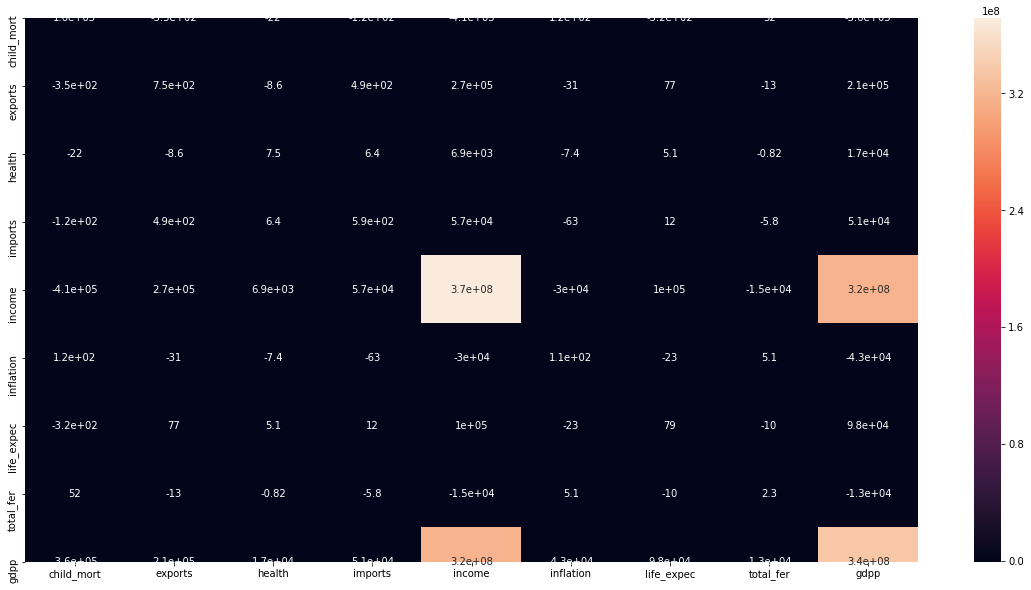

In [21]:
##Plot for covariance
plt.figure(figsize=(20,10))
sns.heatmap(df.cov(),annot=True)
plt.show()

In [22]:
##Corerelation table
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


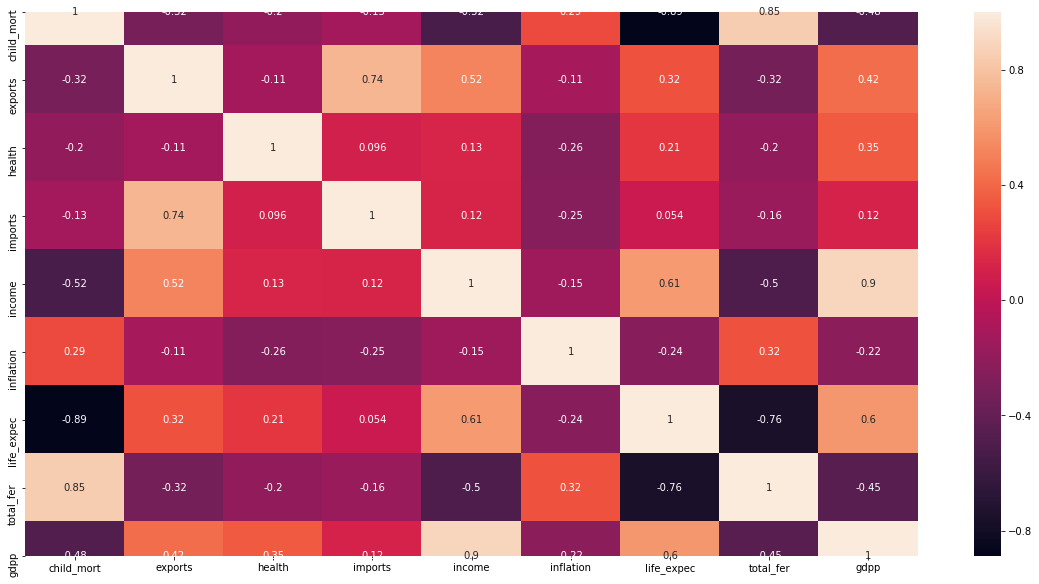

In [23]:
##Plot for correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Relationship between Independant Variables

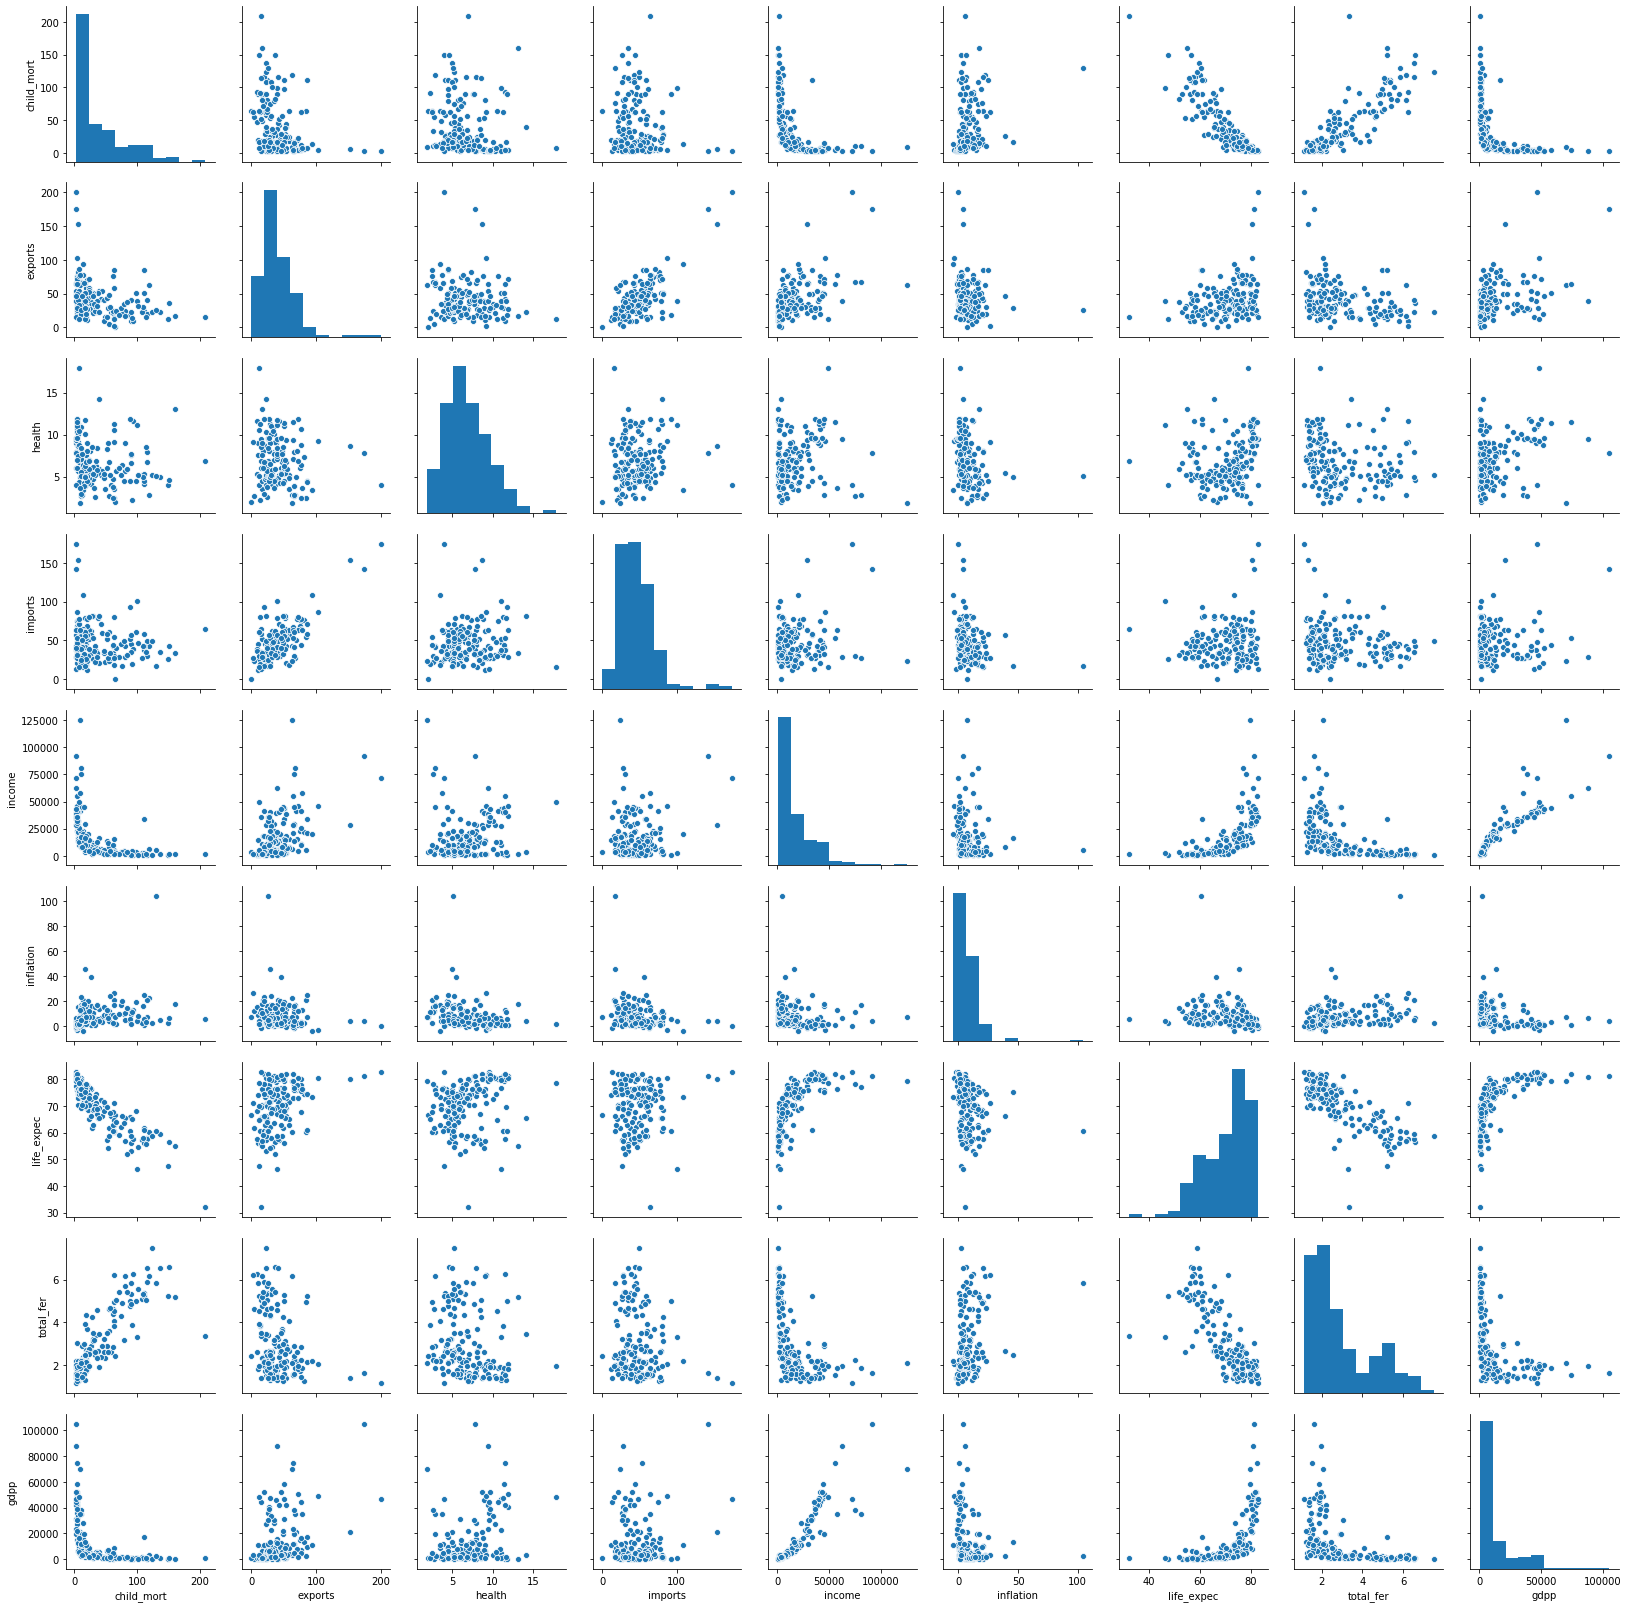

In [25]:
sns.pairplot(data=df)
plt.show()

In [26]:
##Above we can see how the quantitative variables are related to each other

In [27]:
##We can see that child mortality and total_fer have a good correlation. Similary we can check for other variables

##GDPP and income show some correlation as well
##Health and life expectancy show randomness, although they are not completely random
##Inflation and total_fer show that inflation mostly remains the same with the change in total_fer

##We can also see correlation among variables from the heatmap plotted before this
##WE see exports has good correlation with imports, which seems to be very obvious

In [28]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

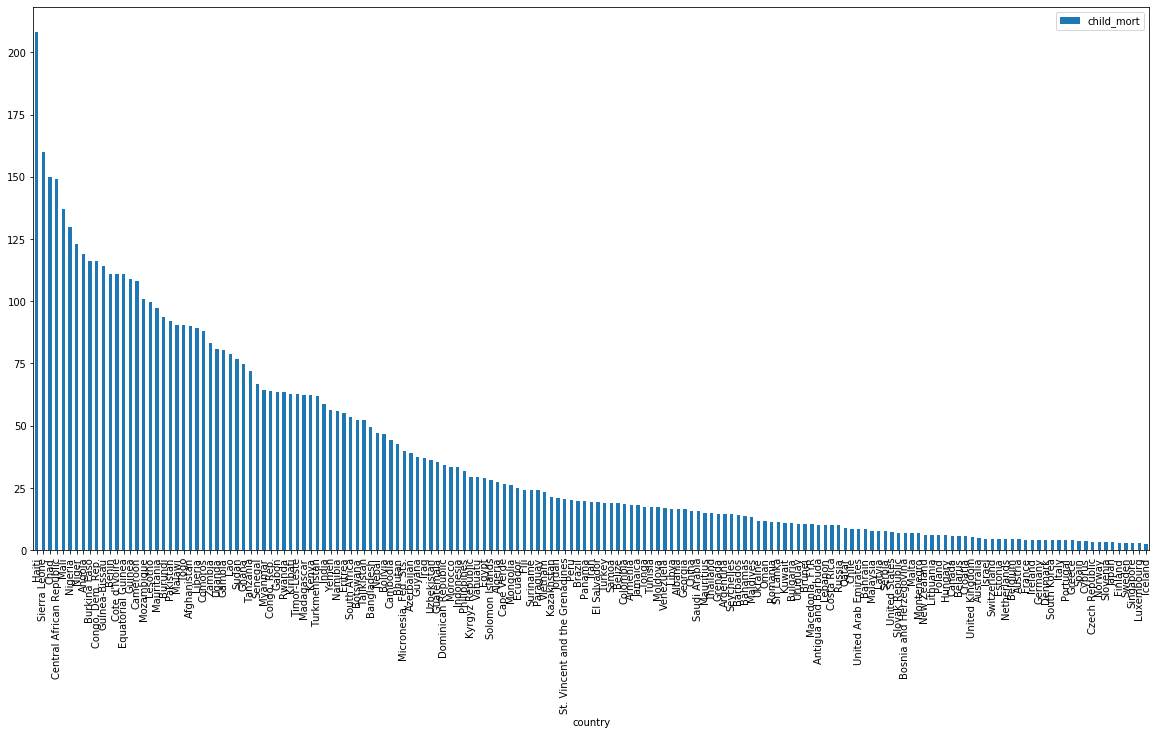

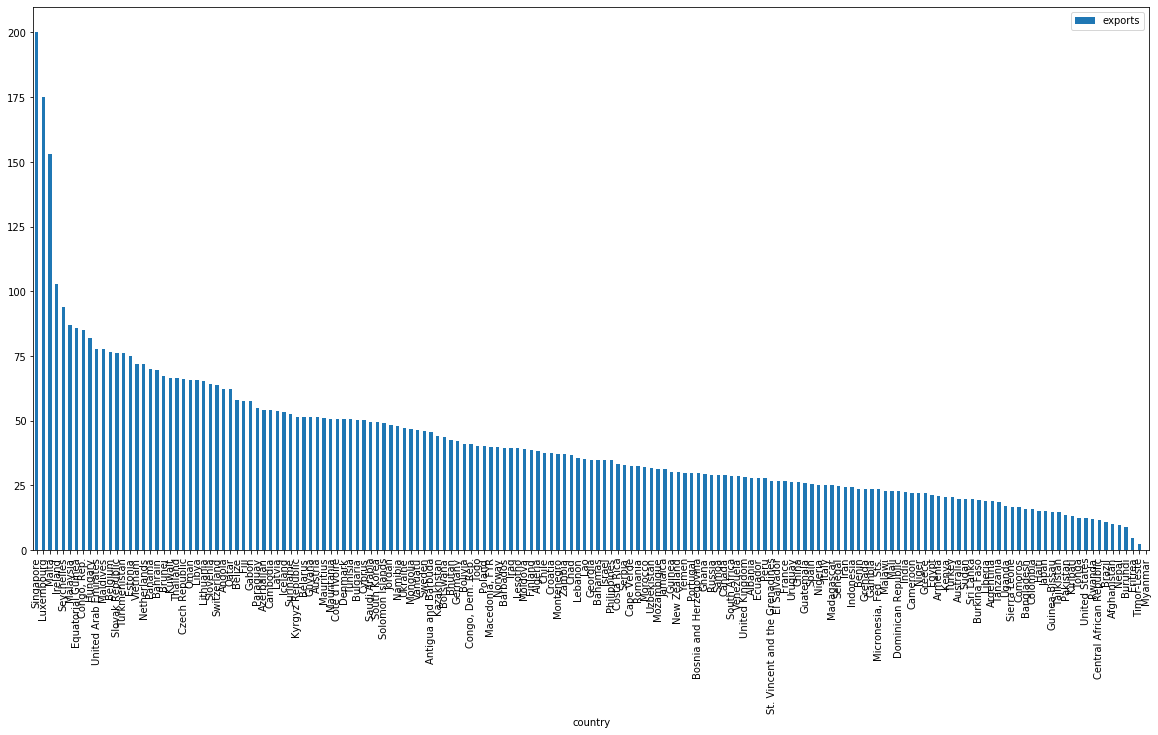

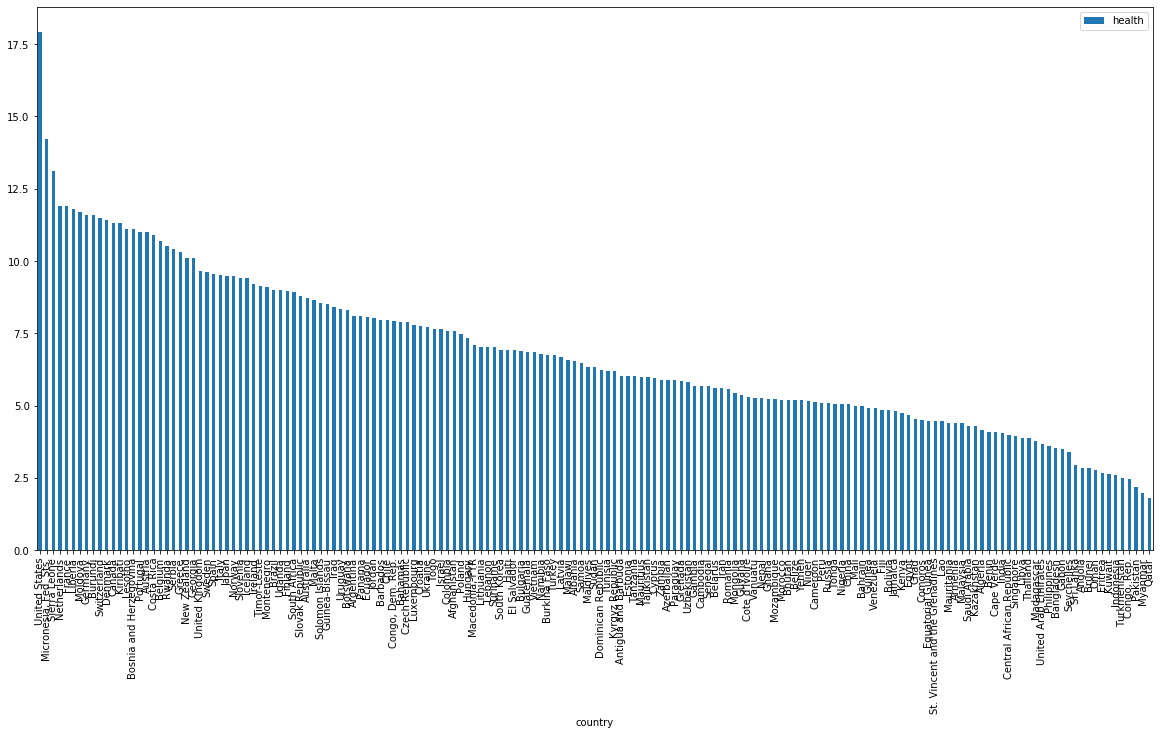

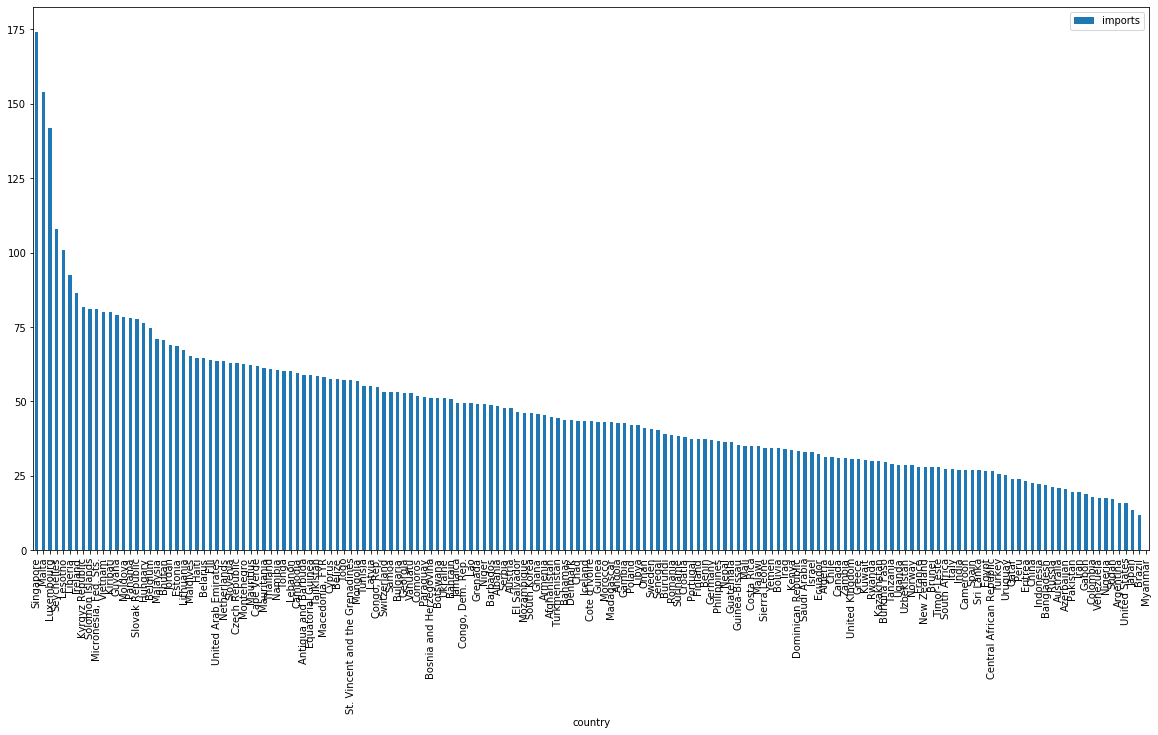

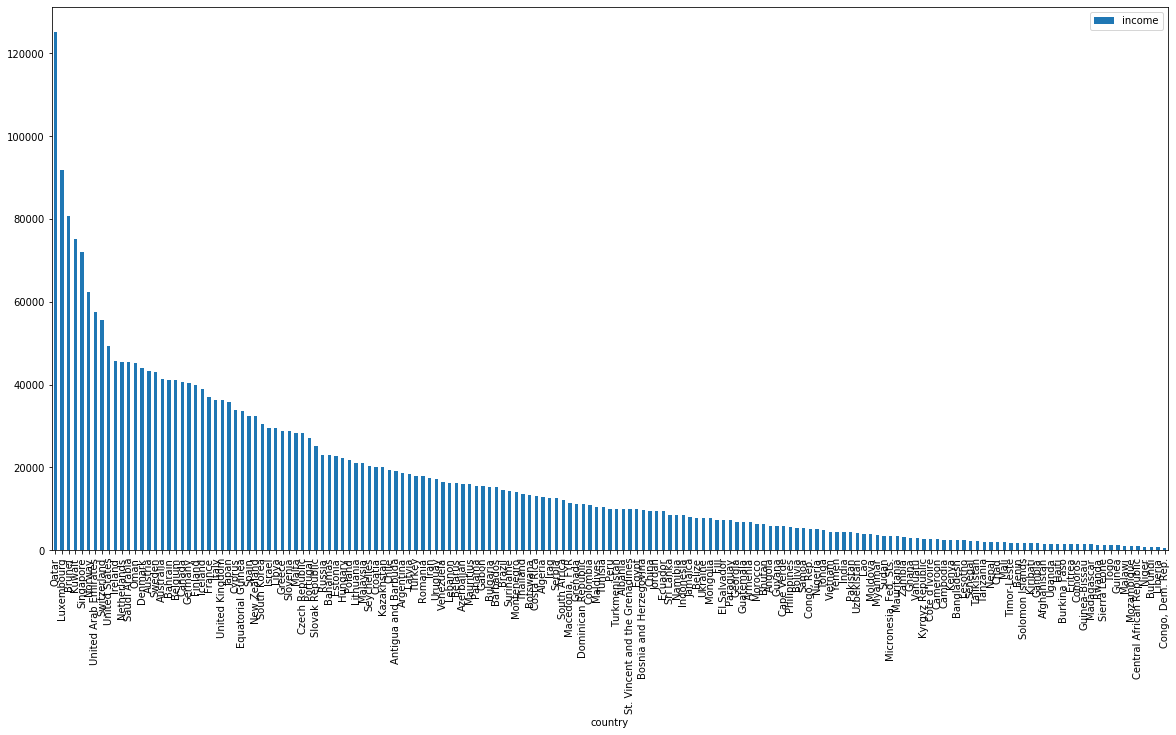

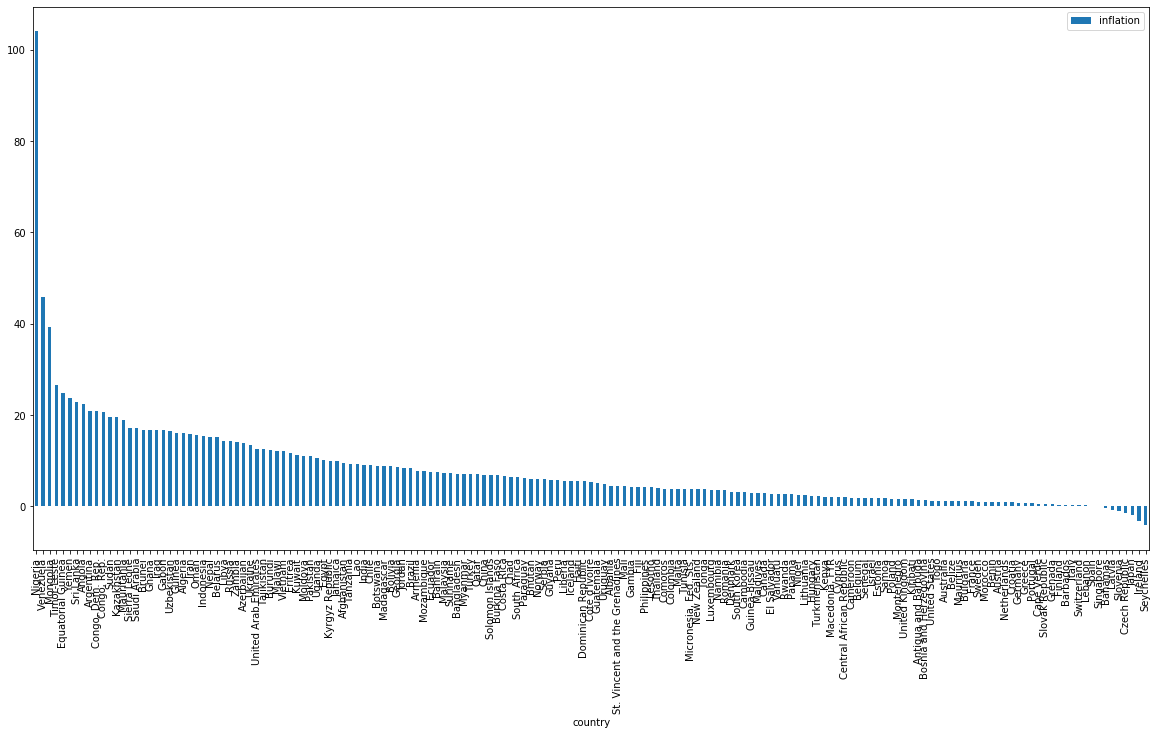

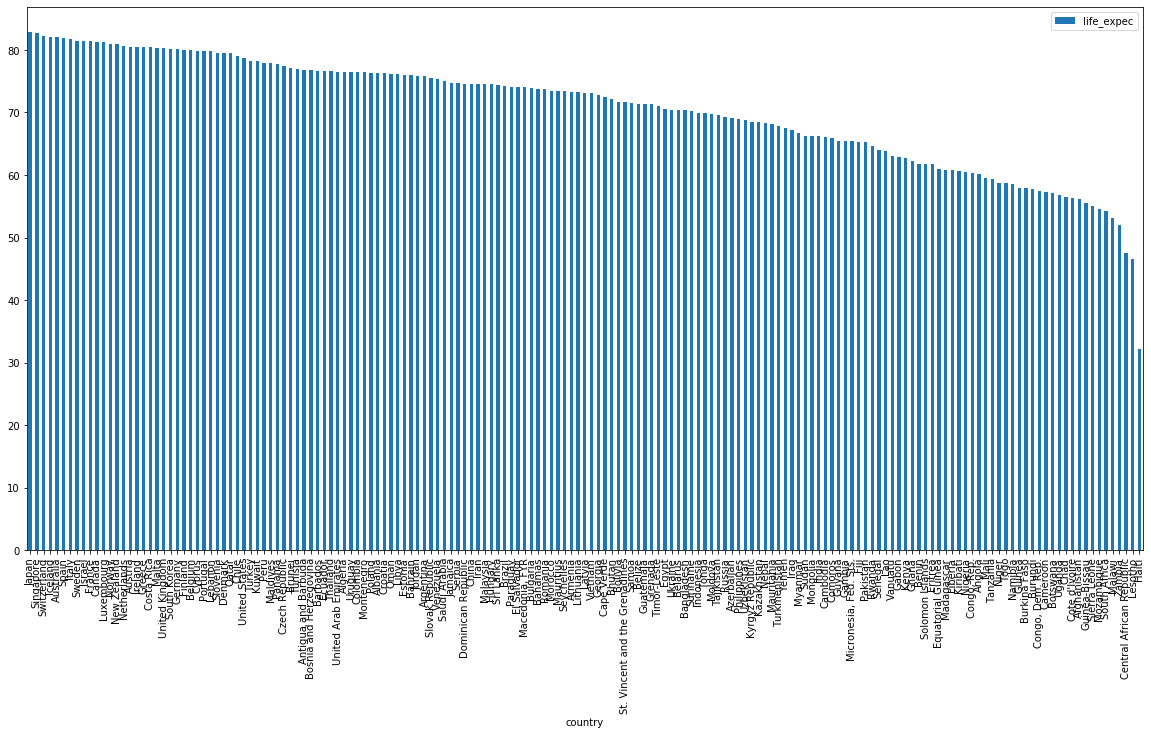

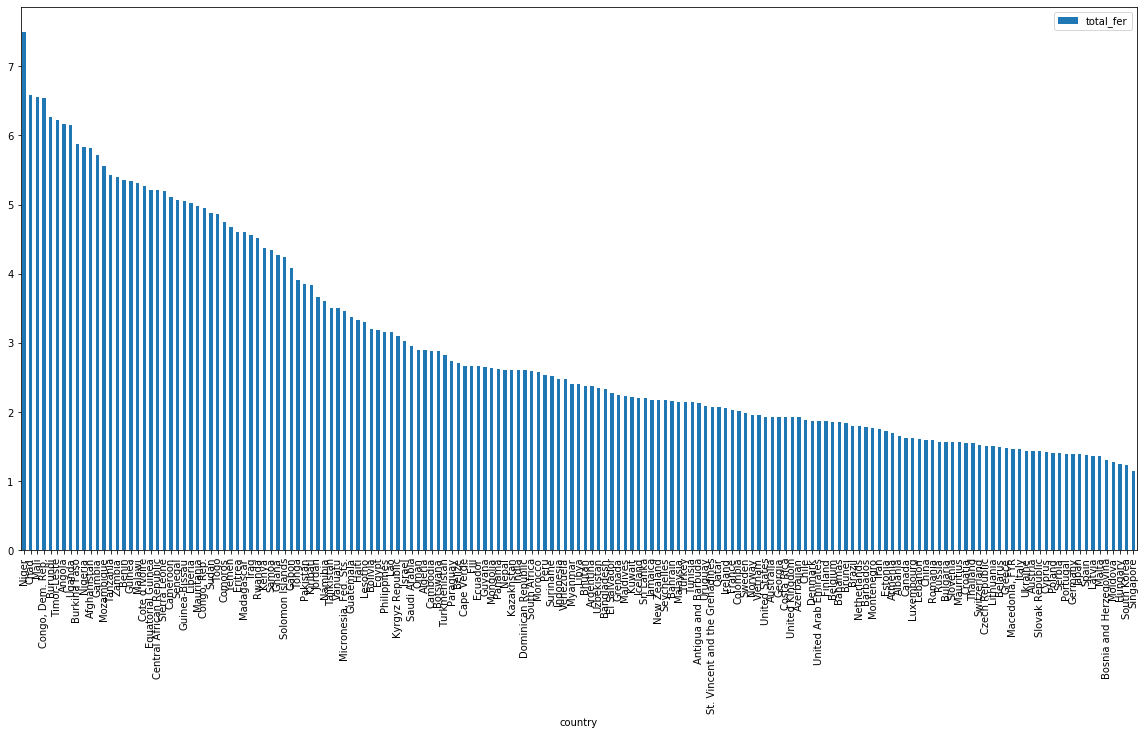

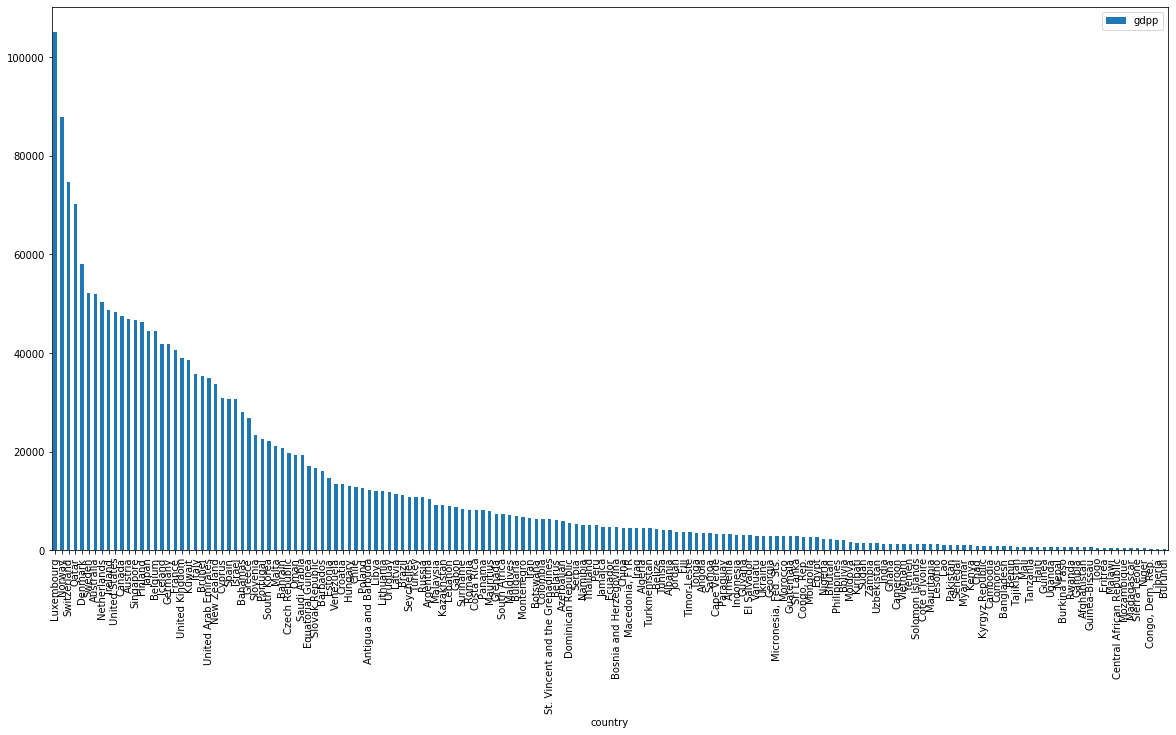

In [29]:
for i in ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']:
    df.groupby('country').agg({i:'mean'}).sort_values(by=i,ascending=False).plot.bar(figsize=(20,10))
    plt.show()

In [30]:
##Above we can see the mean of all the variables taken across each country, from highest to lowest

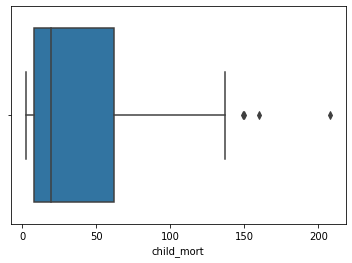

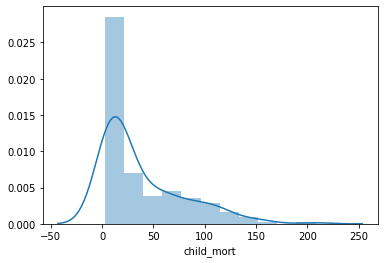

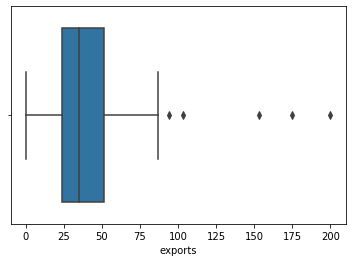

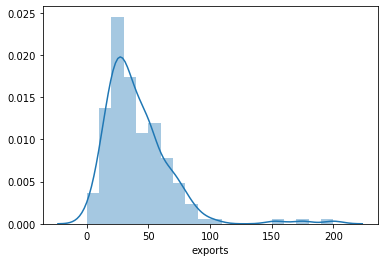

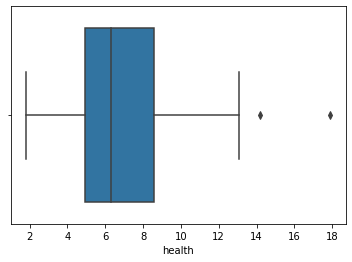

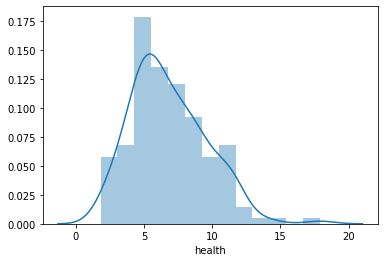

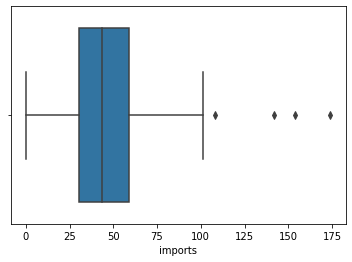

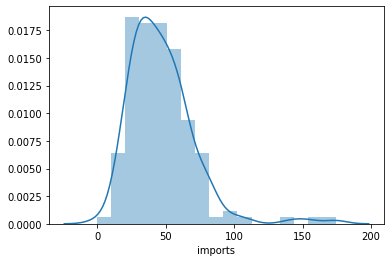

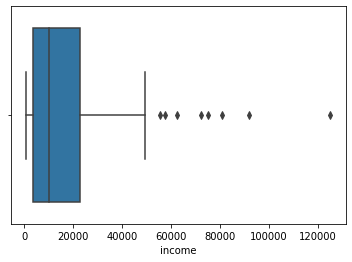

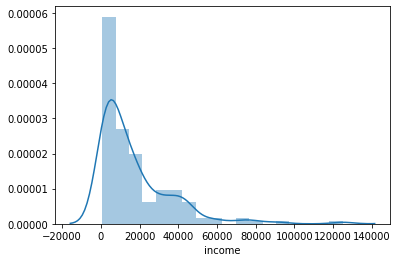

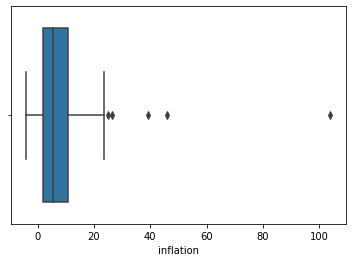

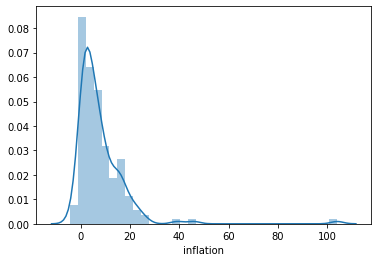

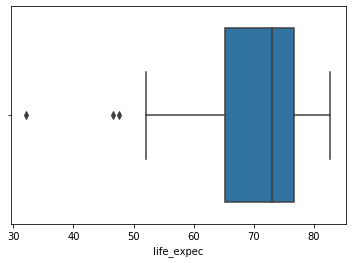

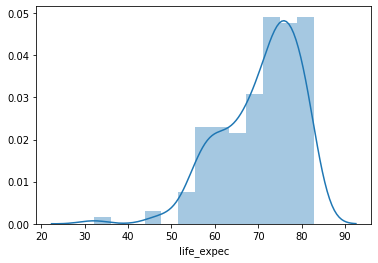

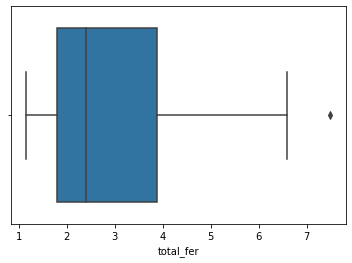

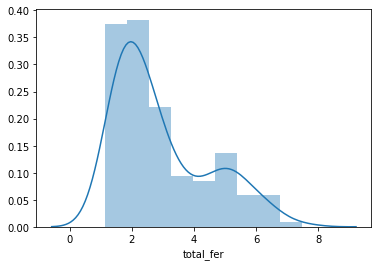

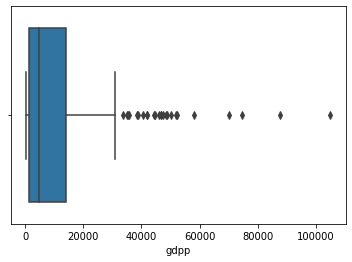

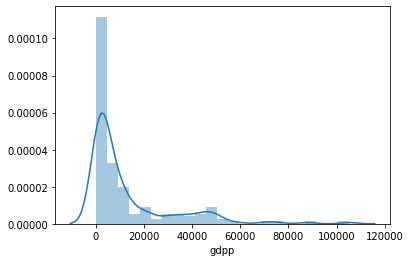

In [31]:
for i in ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']:
    sns.boxplot(df[i])
    plt.show()
    sns.distplot(df[i])
    plt.show()

In [32]:
##We can see that for GDPP, quite a large number of outliers exist.
##above we can also see the distribution of all the quantitative variables

# Data Preparation


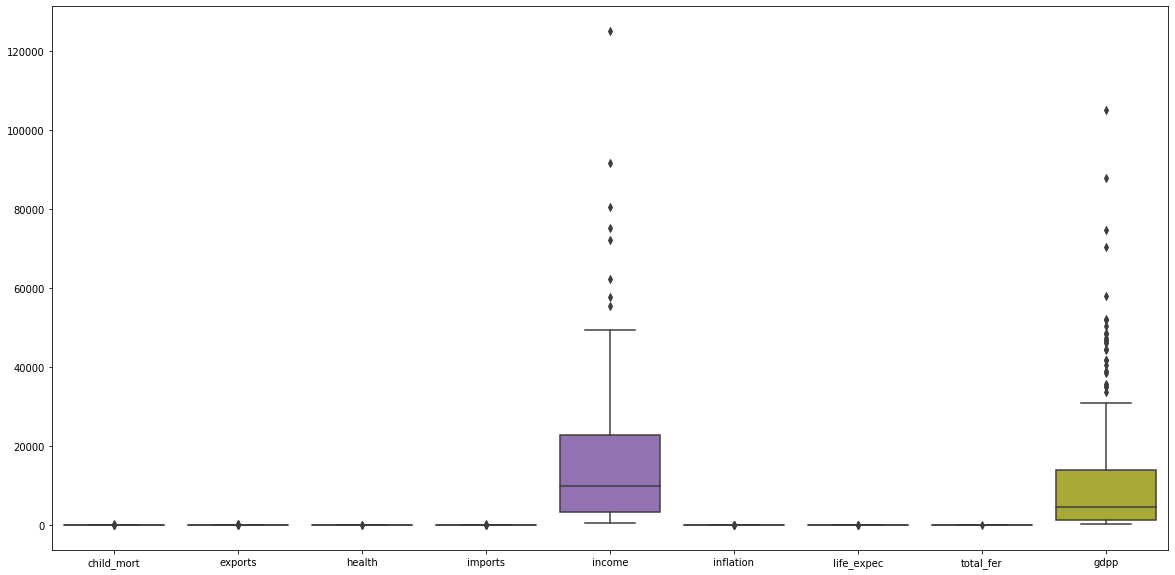

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

In [35]:
##Let's check which transformation helps us in including outliers, since we don't want to miss out on any data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


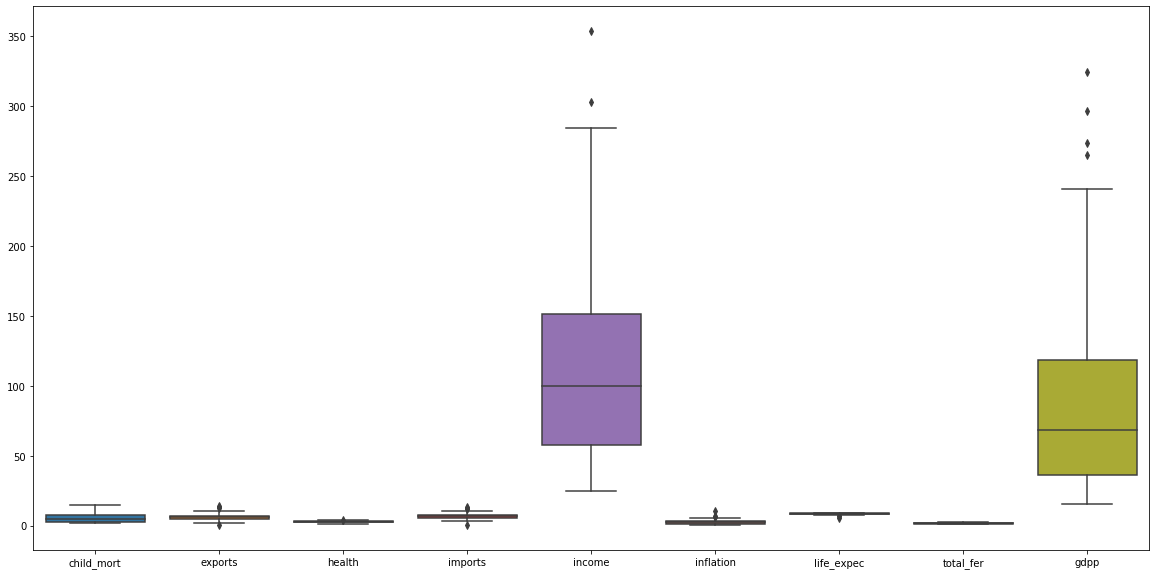

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=np.sqrt(df.drop(columns='country')))
plt.show()

In [37]:
##Square root is doing a pretty good job, so let's check the data as well

In [38]:
np.sqrt(df.drop(columns='country')).isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


child_mort    0
exports       0
health        0
imports       0
income        0
inflation     8
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [39]:
##WE see null values in inflation, so let's try another technique

In [40]:
np.exp(df.drop(columns='country')).isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  

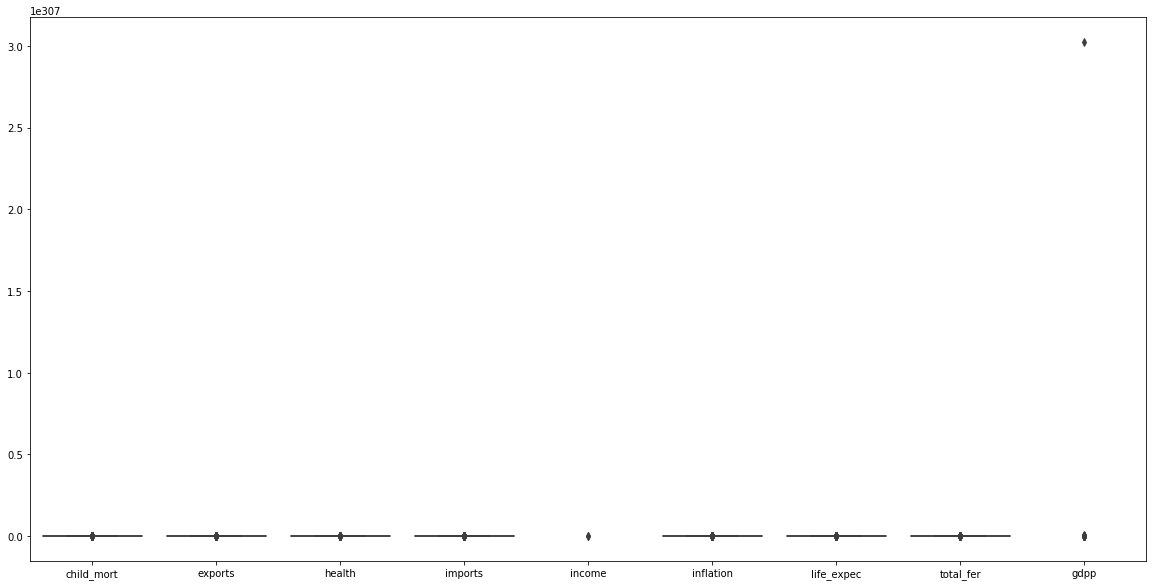

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(data=np.exp(df.drop(columns='country')))
plt.show()

In [42]:
##We see that exponential will not represent our data correctly, so let's try another transformation

In [43]:
((df.drop(columns='country'))**2).isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

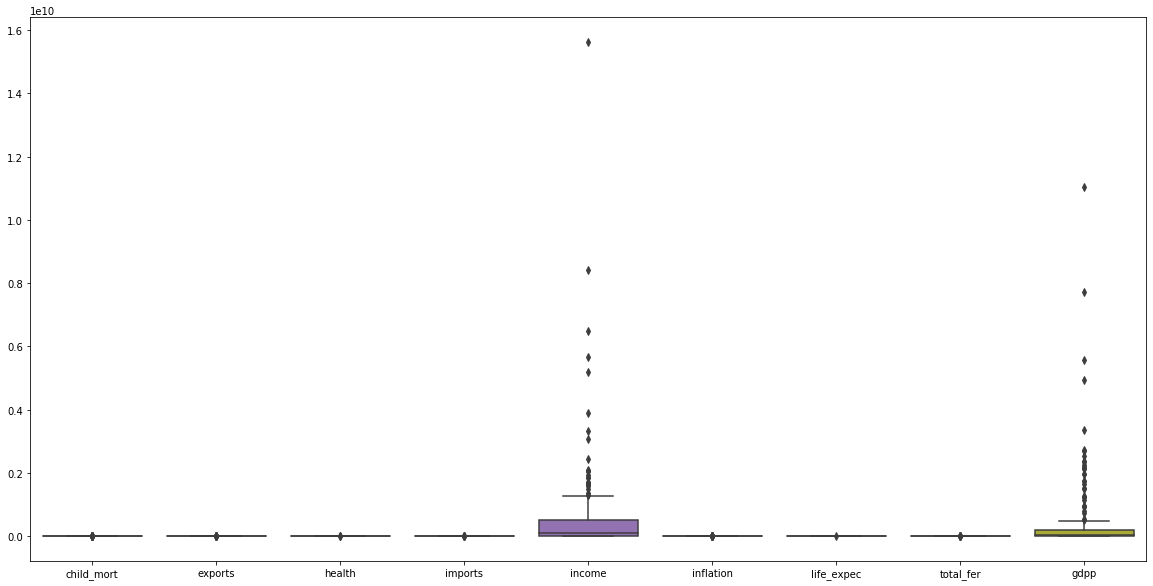

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(data=((df.drop(columns='country'))**2))
plt.show()

In [45]:
##So, we that squaring data is also not doing a good job

In [46]:
##Let's try log transformation

In [47]:
np.log(df.drop(columns='country')).isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


child_mort    0
exports       0
health        0
imports       0
income        0
inflation     8
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [48]:
##this is giving us null values as well

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


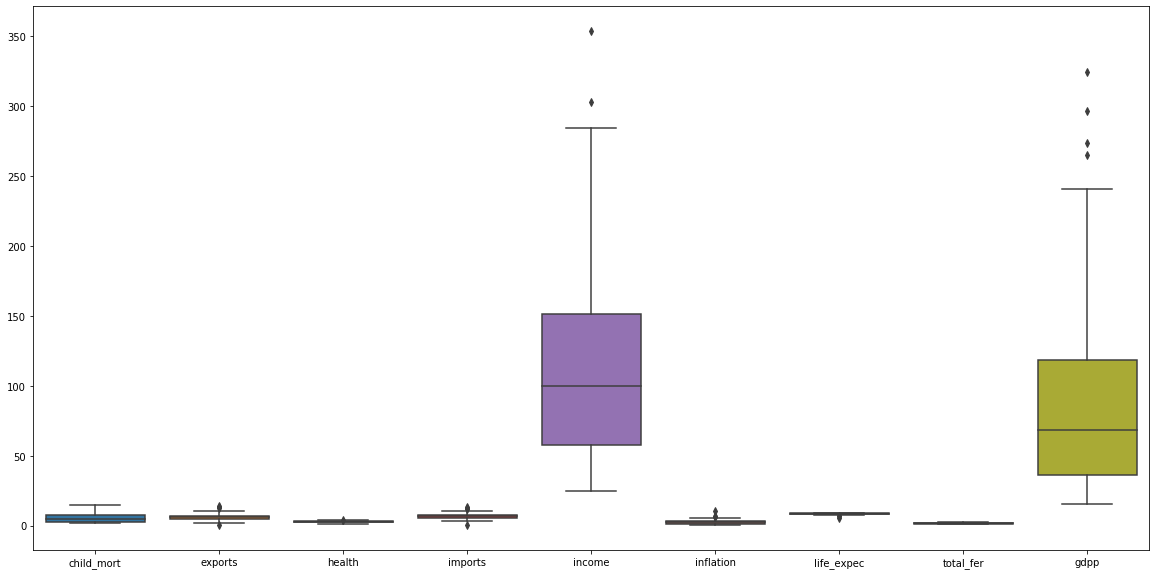

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(data=np.sqrt(df.drop(columns='country')))
plt.show()

In [50]:
##Using np.sqrt (square root) is including the outliers in most cases, but we are obtaining certain null values in 
#our inflation data

In [51]:
np.sqrt(df.drop(columns='country')).isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


child_mort    0
exports       0
health        0
imports       0
income        0
inflation     8
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [52]:
np.sqrt(df.drop(columns='country'))['inflation']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


0      3.072458
1      2.118962
2      4.012481
3      4.732864
4      1.200000
         ...   
162    1.618641
163    6.774954
164    3.478505
165    4.857983
166    3.741657
Name: inflation, Length: 167, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


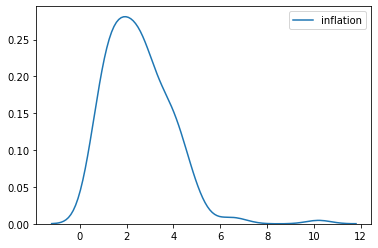

In [53]:
sns.kdeplot(np.sqrt(df.drop(columns='country'))['inflation'])

In [54]:
##So, we can actually consider this since it makes our data look cleaner and outliers have been included,
#so we can impute these null values, but imputing these null values would mean that we are imputing the transformed data,
#which would not be the best decision to make, so we will proceed with our original data itself

In [55]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


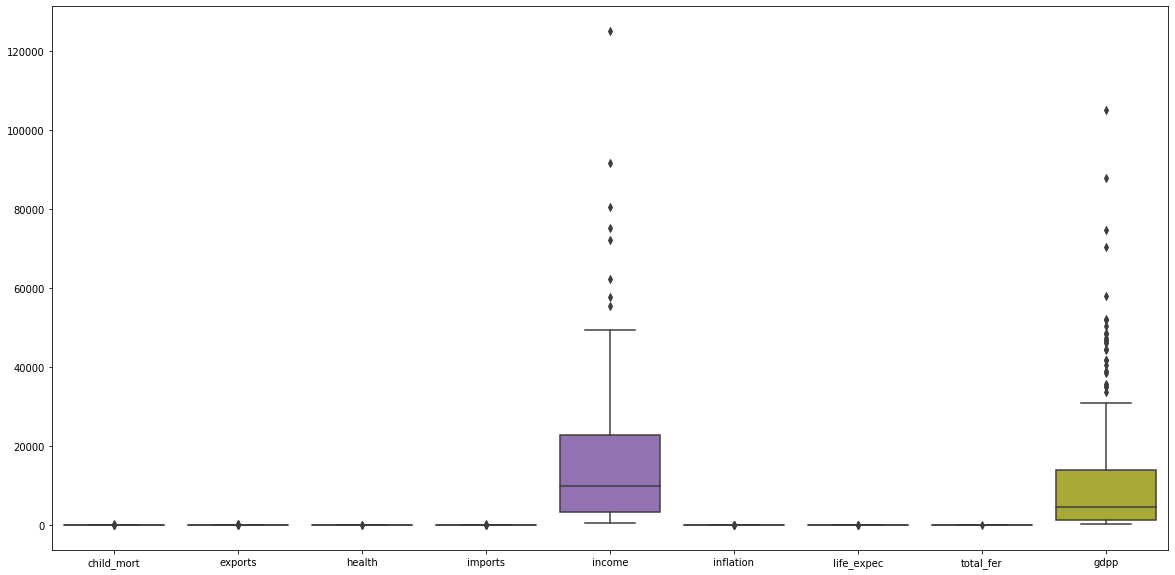

In [56]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

In [57]:
##Now, let's try removing the outliers

In [58]:
##From gdpp first:
q1 = df['gdpp'].quantile(0.25)
q3 = df['gdpp'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['gdpp']>ll)&(df['gdpp']<ul)]

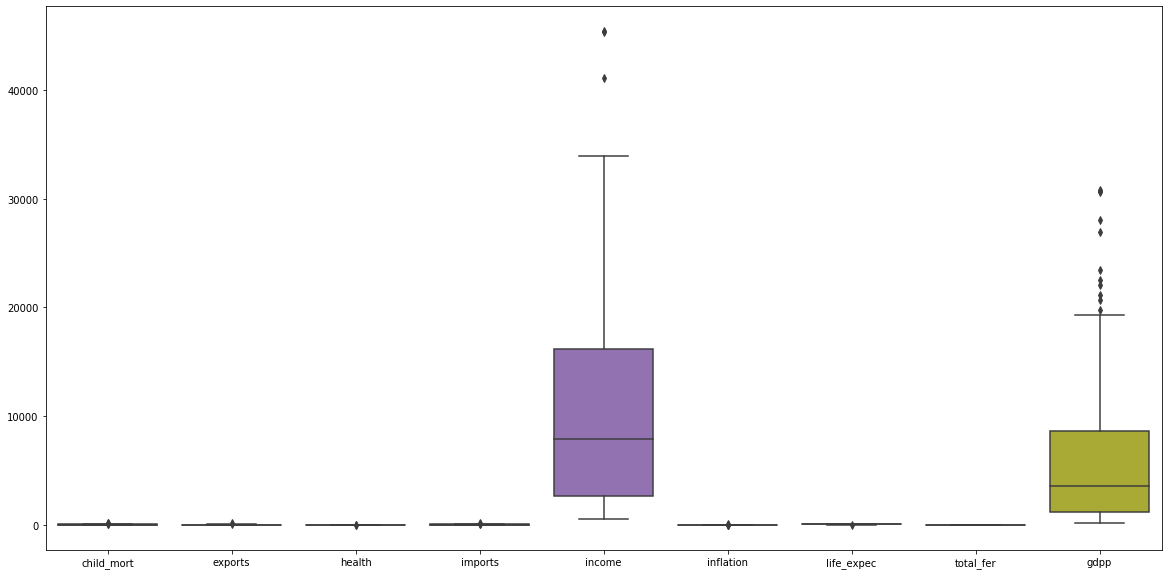

In [59]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1)
plt.show()

In [60]:
##Now, income has only a few outliers, so we will skip removing outliers from income, because it is actually possible
#since few people might be having exceptional incomes
##so, we will proceed now

In [61]:
##Since we are proceeding with Unsupervised learning, we will drop country now

In [62]:
df2 = df1.drop(columns='country')

child_mort


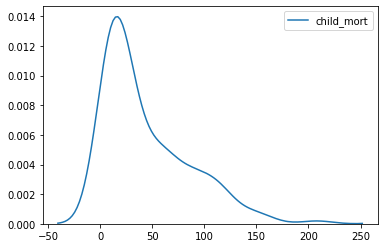

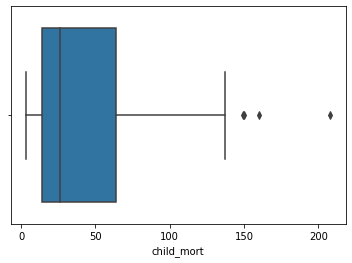

exports


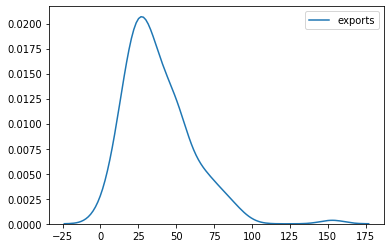

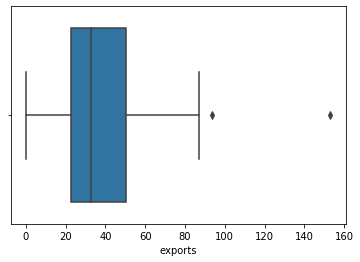

health


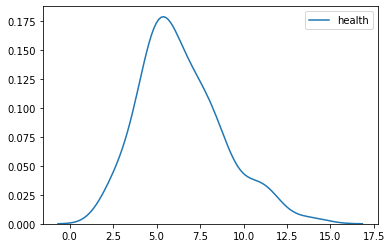

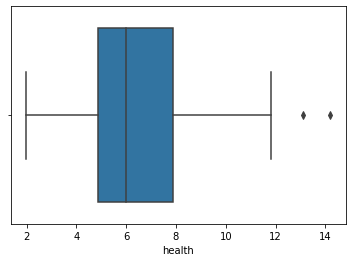

imports


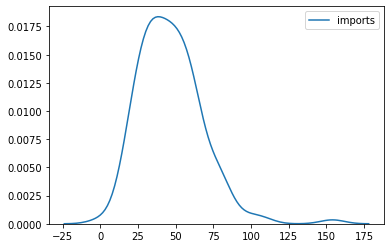

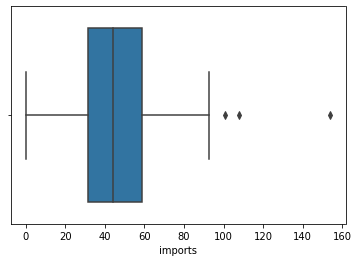

income


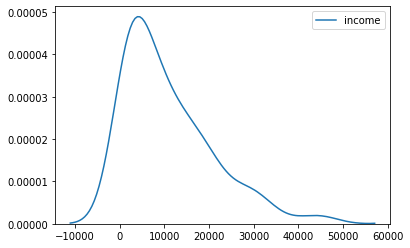

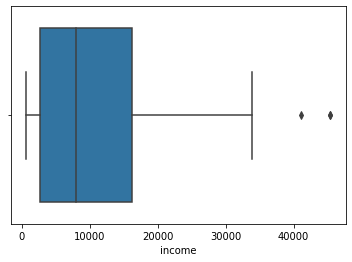

inflation


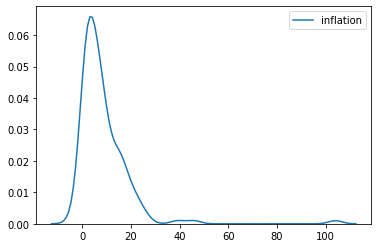

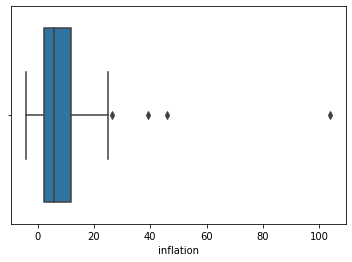

life_expec


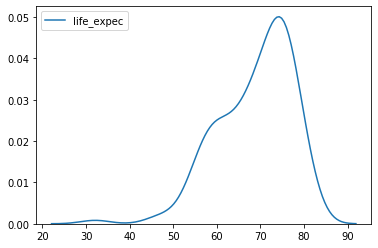

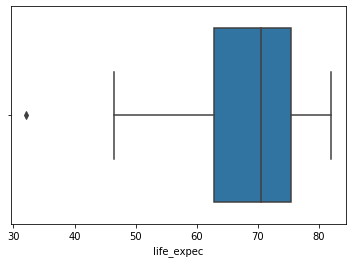

total_fer


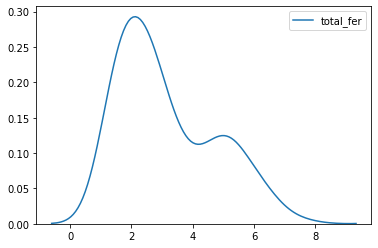

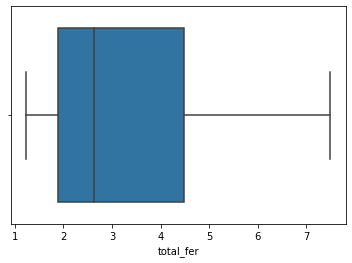

gdpp


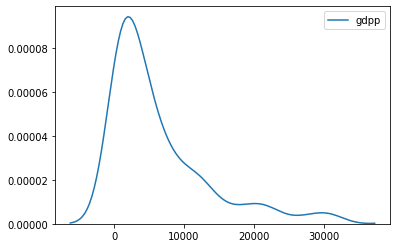

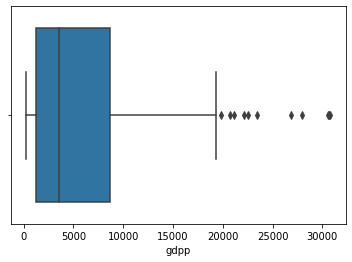

In [63]:
##Boxplot and KDEplot for quantitative variables
for i in df2.columns:
    print(i)
    sns.kdeplot(df2[i])
    plt.show()
    sns.boxplot(df2[i])
    plt.show()

In [64]:
##At this moment, data looks pretty clean, so we will proceed

In [65]:
##We need to normalize the data now: 

In [66]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df2)

# Dimensionality Reduction

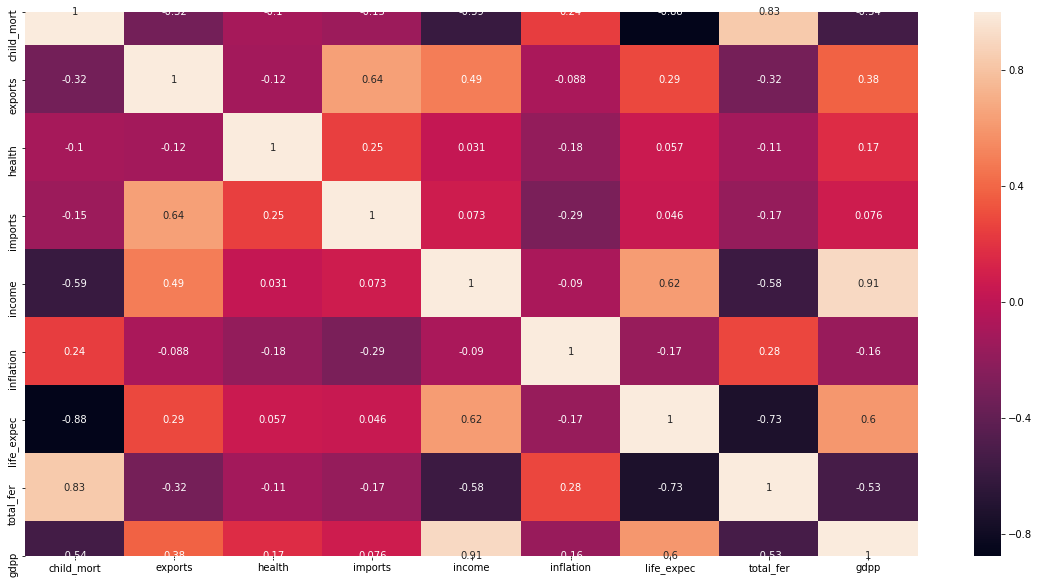

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [69]:
##Based on the variables which are highly correlated with each other, we can use PCA to map them into a single feature\
#so that these features(if used separately), don't impact the model in a negative way
##We do see a correlation of greater than 0.5(value-can be positive or negative) for many varibles
##For example life expectancy and child mortality have a negative correlation of value -0.88
##total fer and child mortality have a positive correlation of value +0.83

##So, if we apply PCA, the variance caused in the data, by these variables, will then be explained with a combined
#newly created Principal component

# Choosing the Number of PCA Components based on amount of Variance Explained

In [71]:
from sklearn.decomposition import PCA

In [72]:
X_std = StandardScaler().fit_transform(df2)

In [73]:
cov_matrix = np.cov(X_std.T)

In [74]:
cov_matrix

array([[ 1.0070922 , -0.32398508, -0.10407763, -0.15060019, -0.59516756,
         0.24542506, -0.88189728,  0.83800673, -0.54538536],
       [-0.32398508,  1.0070922 , -0.11758297,  0.64088814,  0.49410508,
        -0.08872893,  0.28874313, -0.31849455,  0.38571519],
       [-0.10407763, -0.11758297,  1.0070922 ,  0.25008567,  0.03104696,
        -0.18339453,  0.05690089, -0.11455113,  0.17232322],
       [-0.15060019,  0.64088814,  0.25008567,  1.0070922 ,  0.07326678,
        -0.2929089 ,  0.0467418 , -0.17613307,  0.07697993],
       [-0.59516756,  0.49410508,  0.03104696,  0.07326678,  1.0070922 ,
        -0.09103599,  0.62673847, -0.58345942,  0.91377322],
       [ 0.24542506, -0.08872893, -0.18339453, -0.2929089 , -0.09103599,
         1.0070922 , -0.17077473,  0.27912256, -0.16577379],
       [-0.88189728,  0.28874313,  0.05690089,  0.0467418 ,  0.62673847,
        -0.17077473,  1.0070922 , -0.73809473,  0.60129771],
       [ 0.83800673, -0.31849455, -0.11455113, -0.17613307, -0

In [75]:
#Eigen values and eigen vector

In [76]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vals)
print(eig_vecs)

[4.11478549 1.51458837 1.22289073 0.90413888 0.71245244 0.25975443
 0.06712839 0.09791594 0.17017513]
[[-0.43268279  0.12705284 -0.14035908 -0.2652956   0.29344799  0.15042134
  -0.20063165 -0.74629402  0.02479168]
 [ 0.27511883  0.41715275 -0.53942174 -0.01131698 -0.03806039 -0.06059192
   0.16229676 -0.07540523 -0.64964849]
 [ 0.07460737  0.26439674  0.63092374 -0.59810059 -0.27002758 -0.03128897
  -0.04839151 -0.01385579 -0.30382792]
 [ 0.14799877  0.72757198 -0.11593252  0.01482723 -0.21766343 -0.02627613
  -0.10859514  0.01324801  0.61240425]
 [ 0.41658057 -0.15165935 -0.20770985 -0.33538809  0.29577481  0.10702339
  -0.70696646  0.21980574  0.02790418]
 [-0.15457041 -0.34088789 -0.44702842 -0.41102888 -0.68124488  0.08139198
   0.04216208  0.00350324  0.13643725]
 [ 0.42110943 -0.22222487  0.08811097  0.18304067 -0.22844879 -0.60766609
  -0.16713136 -0.52936816  0.04904149]
 [-0.41680476  0.07800451 -0.15202484 -0.25388186  0.22152966 -0.76446833
  -0.02201666  0.31340413  0.0206

In [77]:
eigen_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

In [78]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

Cumulative Variance Explained [ 45.39786808  62.10811534  75.60010223  85.57534341  93.43573418
  96.3015694   98.17908839  99.25938166 100.        ]


In [79]:
df2.shape[1]

9

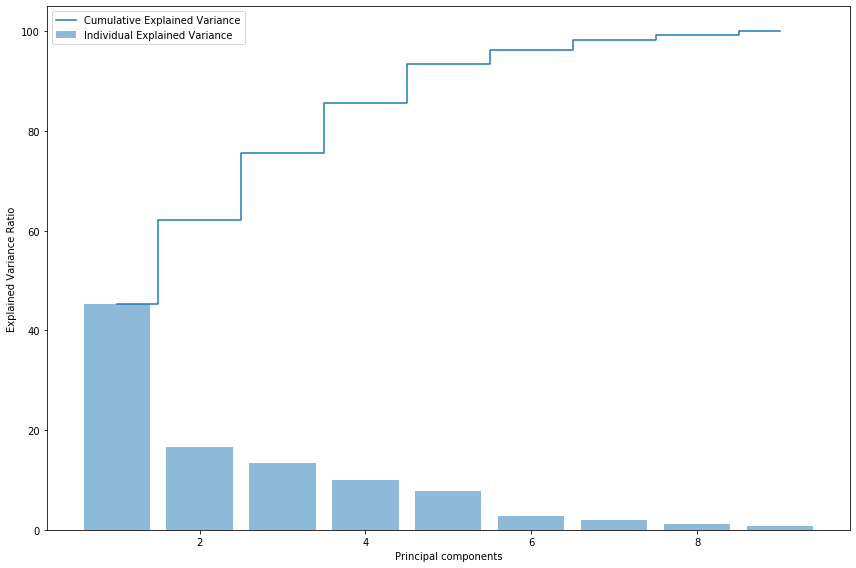

In [80]:
plt.figure(figsize=(12,8))
plt.bar(range(1,10,1),var_exp,alpha=0.5,align='center',label='Individual Explained Variance')
plt.step(range(1,10,1),cum_var_exp,where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [81]:
##We can see from the above plot, where we have explained about Cumulative and Individual Explained Variance
#that the cumulative variance explained between 4 and 5 components will be a little more than 90%, which is what we require
##That is because witha requirement of 90% variance explanation, it is generally said that if a component explains a bit more
#variance, it's better, but it should be at least 90%.
##in our case, 5 components seem to be explaining that value of cumulative variance

# Building Dataset with PCA Components

In [83]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df2)
pc = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [84]:
pc.head()

,PC1,PC2,PC3,PC4,PC5
0,-10960.874411,574.044514,25.428534,-6.413696,-12.861913
1,-2110.899674,-1273.574370,-30.354910,-10.956489,-8.523925
2,538.487087,-2665.853472,-9.609720,-17.602667,8.329397
3,-5739.158841,568.058447,60.165223,28.669745,24.343567
4,10048.104873,147.551919,-16.120162,5.178297,-7.894459


In [85]:
pc.shape

(142, 5)

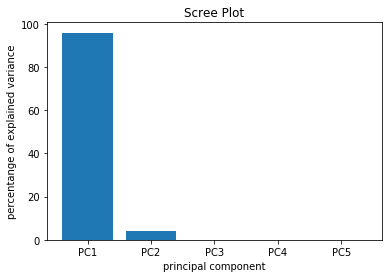

In [86]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

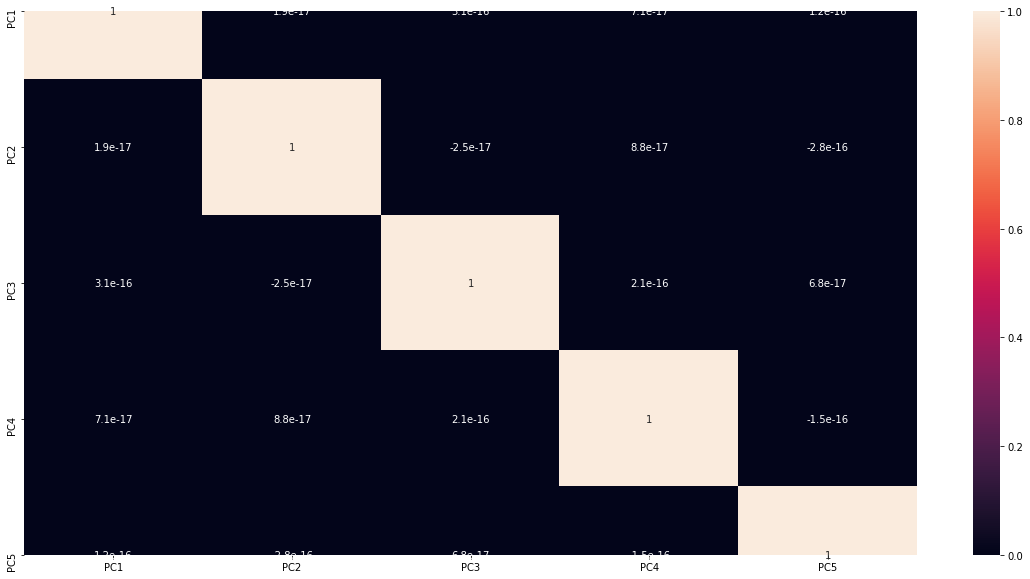

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(pc.corr(),annot=True)
plt.show()

In [88]:
##Now, we see that the correlation between the PCs is extremely close, almost close to 0, which is a good thing
##since these components are explaining cumulative variance around 90%

# How much Variance do these Components exlplain?

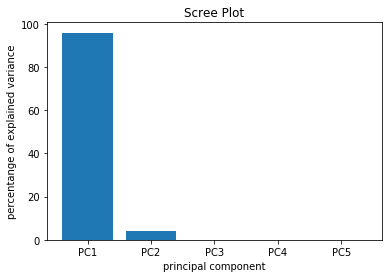

In [90]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Scree Plot')
plt.show()

In [91]:
##Above we can see how much variance is exactly explained by each component, so we see that PC3, PC4 and PC5 don't explain
#much of the variance, but they are needed to explain the cumulative variance of about 90%

In [92]:
pc.head()

,PC1,PC2,PC3,PC4,PC5
0,-10960.874411,574.044514,25.428534,-6.413696,-12.861913
1,-2110.899674,-1273.574370,-30.354910,-10.956489,-8.523925
2,538.487087,-2665.853472,-9.609720,-17.602667,8.329397
3,-5739.158841,568.058447,60.165223,28.669745,24.343567
4,10048.104873,147.551919,-16.120162,5.178297,-7.894459


PC1


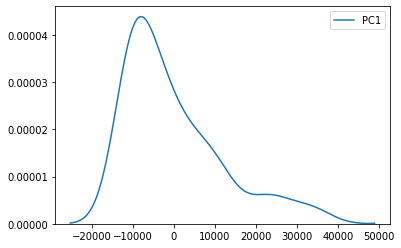

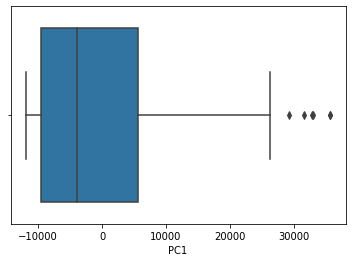

PC2


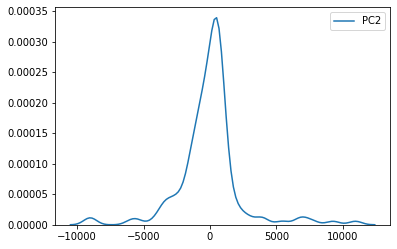

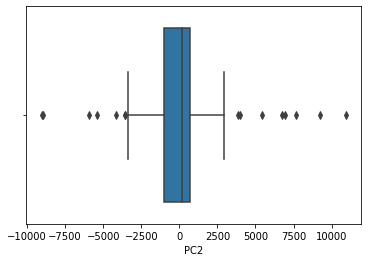

PC3


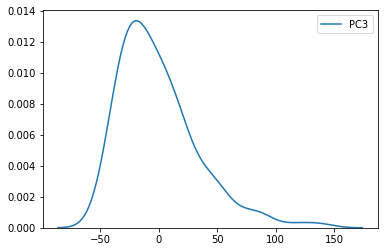

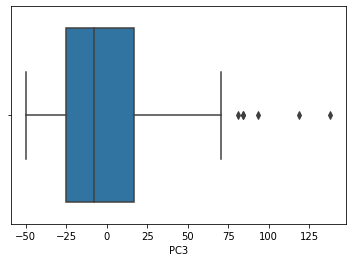

PC4


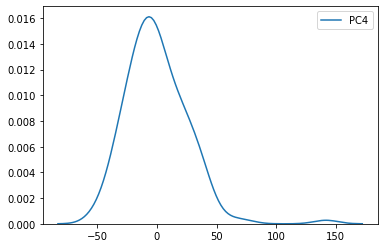

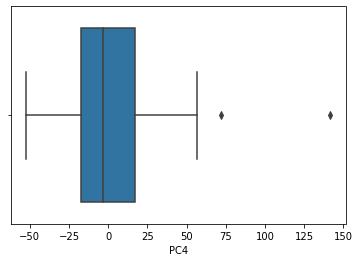

PC5


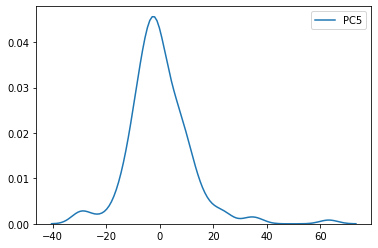

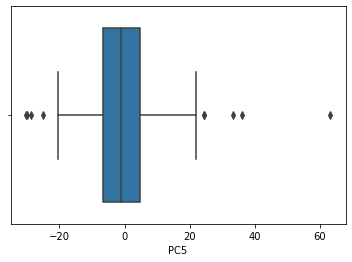

In [93]:
for i in pc.columns:
    print(i)
    sns.kdeplot(pc[i])
    plt.show()
    sns.boxplot(pc[i])
    plt.show()

In [94]:
##Above we can see the distribution in the PCs and if they contain outliers

# Outlier check

PC1


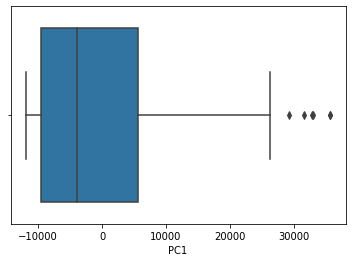

PC2


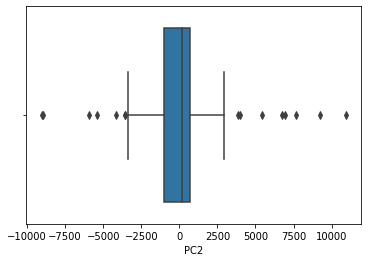

PC3


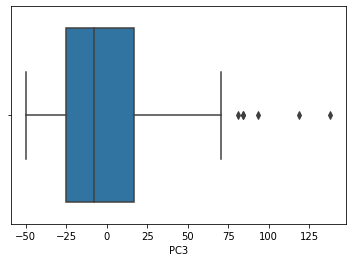

PC4


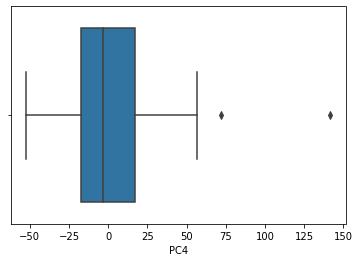

PC5


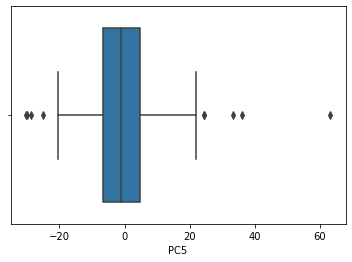

In [96]:
for i in pc.columns:
    print(i)
    sns.boxplot(pc[i])
    plt.show()

In [97]:
##First we can treat outliers in PC2
q1 = pc['PC2'].quantile(0.25)
q3 = pc['PC2'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
pc1 = pc[(pc['PC2']>ll)&(pc['PC2']<ul)]

PC1


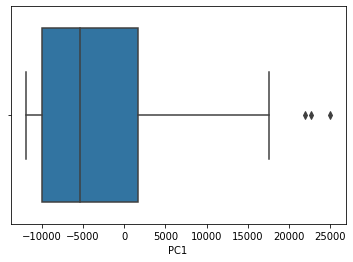

PC2


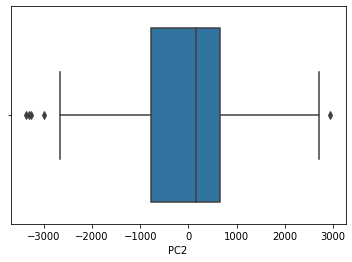

PC3


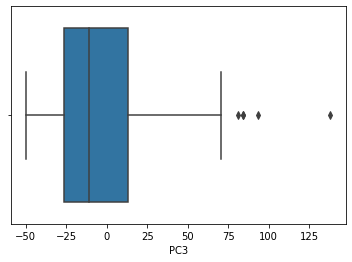

PC4


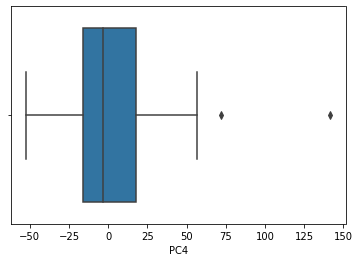

PC5


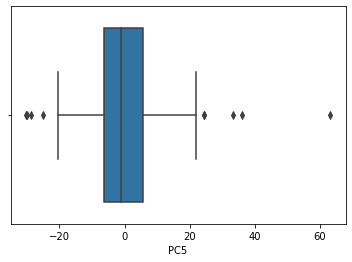

In [98]:
for i in pc1.columns:
    print(i)
    sns.boxplot(pc1[i])
    plt.show()

In [99]:
##then we can treat outliers in PC5
q1 = pc1['PC5'].quantile(0.25)
q3 = pc1['PC5'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
pc1 = pc1[(pc1['PC5']>ll)&(pc1['PC5']<ul)]

PC1


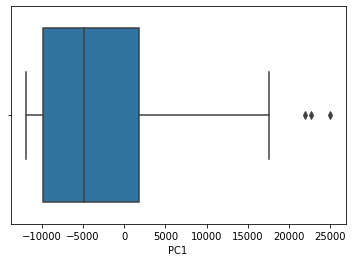

PC2


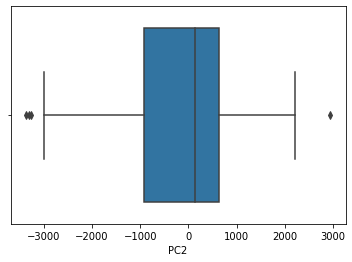

PC3


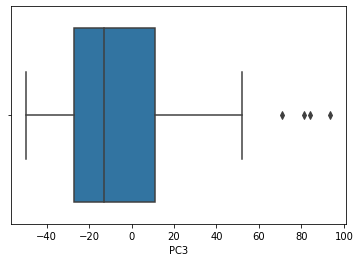

PC4


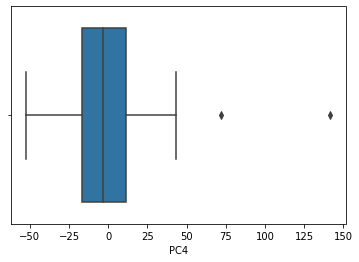

PC5


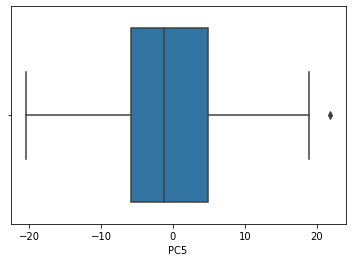

In [100]:
for i in pc1.columns:
    print(i)
    sns.boxplot(pc1[i])
    plt.show()

In [101]:
##then we can treat outliers in PC3
q1 = pc1['PC3'].quantile(0.25)
q3 = pc1['PC3'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
pc1 = pc1[(pc1['PC3']>ll)&(pc1['PC3']<ul)]

PC1


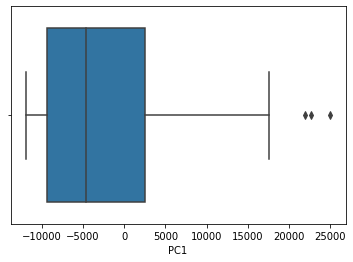

PC2


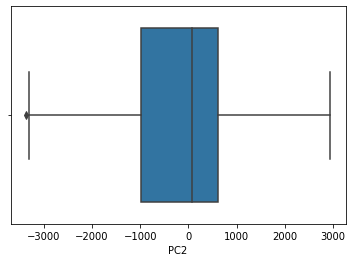

PC3


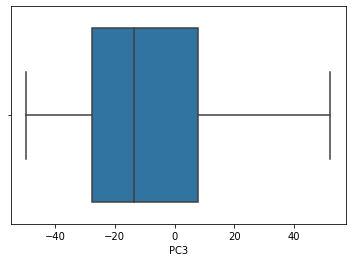

PC4


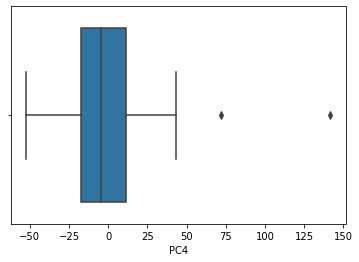

PC5


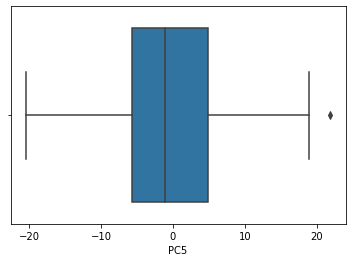

In [102]:
for i in pc1.columns:
    print(i)
    sns.boxplot(pc1[i])
    plt.show()

In [103]:
##then we can treat outliers in PC1
q1 = pc1['PC1'].quantile(0.25)
q3 = pc1['PC1'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
pc1 = pc1[(pc1['PC1']>ll)&(pc1['PC1']<ul)]

PC1


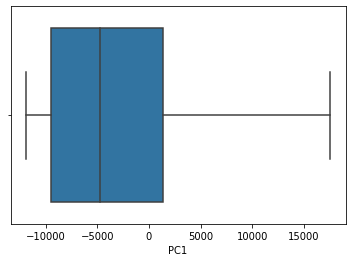

PC2


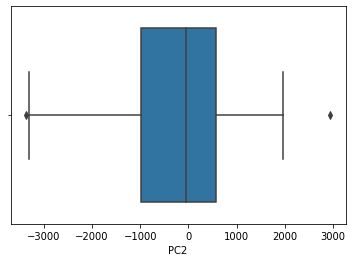

PC3


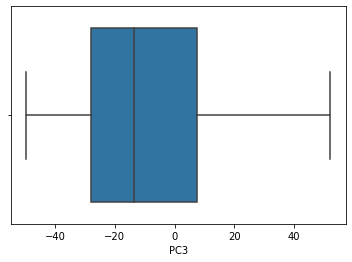

PC4


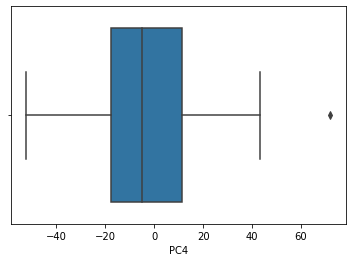

PC5


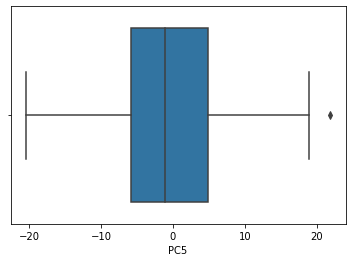

In [104]:
for i in pc1.columns:
    print(i)
    sns.boxplot(pc1[i])
    plt.show()

In [105]:
##then we can treat outliers in PC4
q1 = pc1['PC4'].quantile(0.25)
q3 = pc1['PC4'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
pc1 = pc1[(pc1['PC4']>ll)&(pc1['PC4']<ul)]

PC1


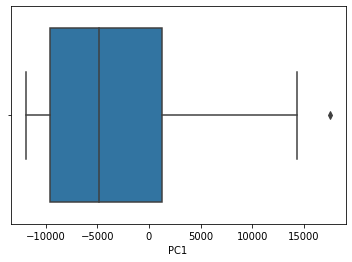

PC2


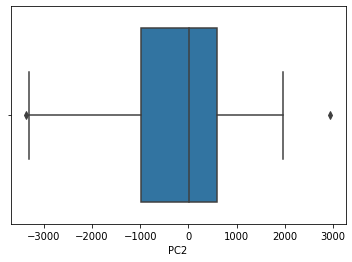

PC3


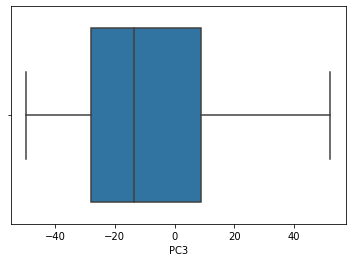

PC4


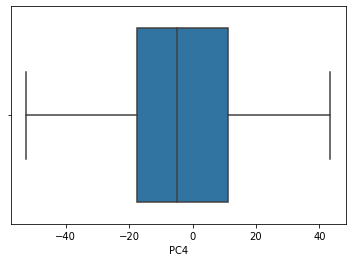

PC5


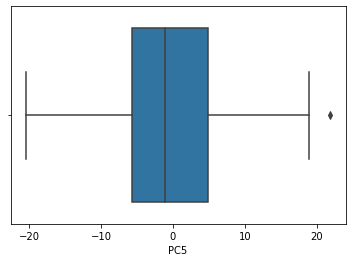

In [106]:
for i in pc1.columns:
    print(i)
    sns.boxplot(pc1[i])
    plt.show()

In [107]:
##Data seems fairly clean now. We have tried to remove as many outliers as possible from all the PCs

# K-Means Clustering


PC1


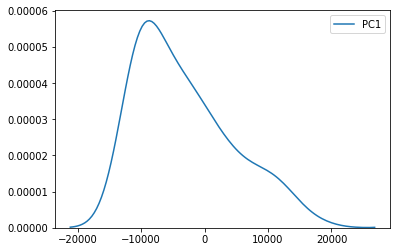

PC2


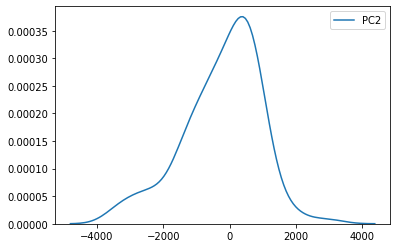

PC3


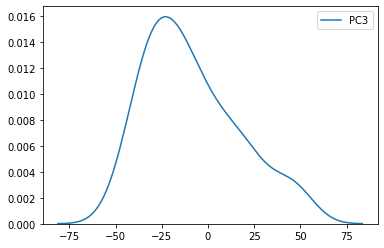

PC4


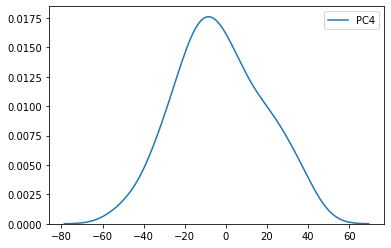

PC5


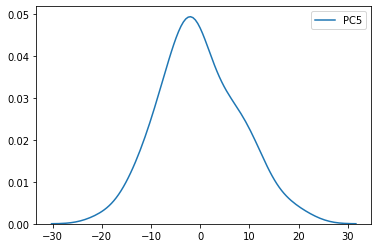

In [109]:
for i in pc1.columns:
    print(i)
    sns.kdeplot(pc1[i])
    plt.show()

In [110]:
##As we can see above, data looks fairly normal, but we see some skewness here and there,and it is quite evident in the first
#three PCs, so we will try to normalize our data:

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(pc1)

In [111]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,550.000000
1,2,412.134974
2,3,344.299878
3,4,297.543226
4,5,256.998469
5,6,228.607445
6,7,206.643703
7,8,187.310425
8,9,171.642043
9,10,153.120877


Text(0, 0.5, 'Cluster Errors')

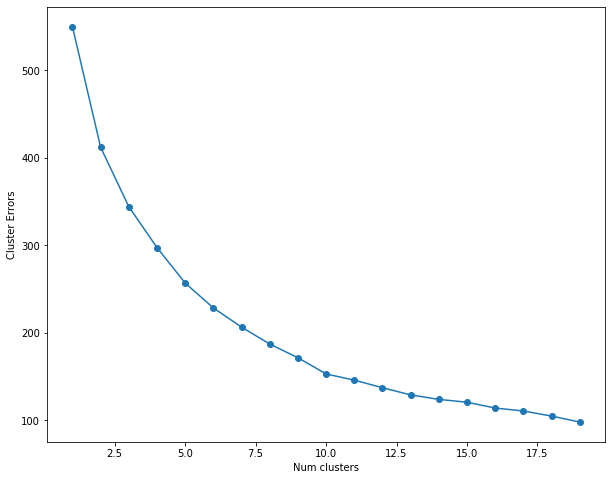

In [112]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [113]:
##We see k = 10 as the optimum number of cluster from the above elbow curve, and now we will fit the model

In [115]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=10)
Kmean.fit(pc1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [117]:
Kmean.cluster_centers_

array([[-5.60996812e+03, -2.45773162e+02, -2.96132966e+01,
         1.53871001e+00, -1.48748120e-02],
       [ 4.84660651e+03, -1.43433205e+03, -1.56089519e+01,
        -2.17623871e+00, -7.89685484e-01],
       [ 1.20064020e+04, -8.89846406e+02, -1.12428477e+01,
        -4.42668469e+00, -9.39988373e-01],
       [-8.83107696e+03,  3.43395248e+02,  1.24526633e+00,
         1.10557499e-01,  4.01402399e+00],
       [-2.64239145e+03, -8.45580405e+02, -2.27931638e+01,
        -7.85669402e+00,  2.09185151e+00],
       [ 8.86088191e+03, -5.95971943e+02, -8.04015491e+00,
        -1.92547534e+01, -3.67963821e-01],
       [ 1.59711354e+04,  1.69046460e+02, -1.32487783e+01,
         3.29031126e+01,  1.10162624e+00],
       [-1.09571069e+04,  6.56778432e+02,  1.41244740e+01,
        -2.47392395e+00, -3.36790201e+00],
       [ 5.27827583e+02,  2.40772449e+02, -1.83475454e+01,
        -1.15100725e+01, -1.67462264e+00],
       [ 1.03510969e+03, -2.00198490e+03, -1.77637593e+01,
        -1.25034207e+00

In [118]:
Kmean.labels_

array([7, 4, 9, 5, 5, 0, 1, 7, 1, 4, 7, 0, 0, 4, 9, 1, 1, 7, 7, 7, 3, 0,
       2, 4, 8, 7, 7, 8, 3, 2, 8, 4, 4, 0, 7, 6, 0, 7, 0, 3, 8, 0, 7, 7,
       0, 2, 3, 4, 9, 4, 4, 5, 7, 3, 3, 5, 1, 2, 9, 7, 7, 8, 3, 1, 3, 3,
       0, 9, 0, 7, 3, 4, 7, 7, 3, 1, 0, 4, 0, 2, 1, 2, 7, 0, 7, 9, 6, 7,
       8, 4, 8, 3, 1, 7, 7, 9, 3, 7, 0, 4, 5, 4, 7, 0, 5, 3, 3, 3, 3, 3])

In [119]:
##Analysis of Clusters:
pc1.index = pd.RangeIndex(len(pc1.index))
df_km = pd.concat([pc1,pd.Series(Kmean.labels_)],axis=1)
df_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','ClusterID']

In [120]:
df_km.isna().sum()

PC1          0
PC2          0
PC3          0
PC4          0
PC5          0
ClusterID    0
dtype: int64

In [121]:
df_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-10960.874411,574.044514,25.428534,-6.413696,-12.861913,7
1,-2110.899674,-1273.574370,-30.354910,-10.956489,-8.523925,4
2,538.487087,-2665.853472,-9.609720,-17.602667,8.329397,9
3,10048.104873,147.551919,-16.120162,5.178297,-7.894459,5
4,8634.710701,-1183.736289,-1.432237,-44.855900,4.881065,5
...,...,...,...,...,...,...
105,-8329.483650,-249.016426,-20.494670,-17.819717,14.013342,3
106,-8480.469678,1792.863946,-36.211769,11.280783,7.759154,3
107,-8164.158457,-449.323859,-46.404374,43.420270,13.796470,3
108,-8172.480034,-443.508989,-0.578156,-11.289458,12.954498,3


In [122]:
pc1.head()

,PC1,PC2,PC3,PC4,PC5
0,-10960.874411,574.044514,25.428534,-6.413696,-12.861913
1,-2110.899674,-1273.574370,-30.354910,-10.956489,-8.523925
2,538.487087,-2665.853472,-9.609720,-17.602667,8.329397
3,10048.104873,147.551919,-16.120162,5.178297,-7.894459
4,8634.710701,-1183.736289,-1.432237,-44.855900,4.881065


In [123]:
km_cluster_PC1 = pd.DataFrame(df_km.groupby('ClusterID')['PC1'].mean())
km_cluster_PC2 = pd.DataFrame(df_km.groupby('ClusterID')['PC2'].mean())
km_cluster_PC3 = pd.DataFrame(df_km.groupby('ClusterID')['PC3'].mean())
km_cluster_PC4 = pd.DataFrame(df_km.groupby('ClusterID')['PC4'].mean())
km_cluster_PC5 = pd.DataFrame(df_km.groupby('ClusterID')['PC5'].mean())


df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8,9]),km_cluster_PC1,km_cluster_PC2,km_cluster_PC3,km_cluster_PC4
                ,km_cluster_PC5],axis=1)
df.columns = ['ClusterID','PC1', 'PC2', 'PC3', 'PC4', 'PC5']
df

,ClusterID,PC1,PC2,PC3,PC4,PC5
0,0,-5609.968120,-245.773162,-29.613297,1.538710,-0.014875
1,1,4846.606512,-1434.332050,-15.608952,-2.176239,-0.789685
2,2,12006.401980,-889.846406,-11.242848,-4.426685,-0.939988
3,3,-8831.076955,343.395248,1.245266,0.110557,4.014024
4,4,-2642.391450,-845.580405,-22.793164,-7.856694,2.091852
5,5,8860.881912,-595.971943,-8.040155,-19.254753,-0.367964
6,6,15971.135448,169.046460,-13.248778,32.903113,1.101626
7,7,-10957.106899,656.778432,14.124474,-2.473924,-3.367902
8,8,527.827583,240.772449,-18.347545,-11.510072,-1.674623
9,9,1035.109693,-2001.984897,-17.763759,-1.250342,-1.596497


# Understanding the Clusters

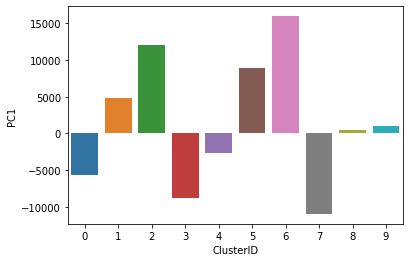

In [124]:
sns.barplot(data=df,x='ClusterID',y='PC1')
plt.show()

In [125]:
##We see that Cluster 6 has the highest mean for the values of PC1, and Cluster 0 has lowest values(negative even so)
#for PC1

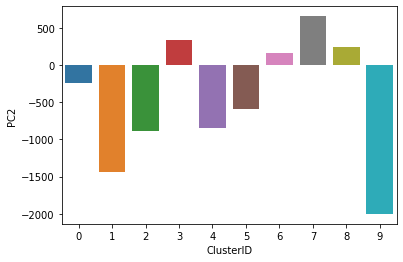

In [126]:
sns.barplot(data=df,x='ClusterID',y='PC2')
plt.show()

In [127]:
##We see that Cluster 1 has the highest mean for the values of PC2, and Cluster 5 has lowest values(negative even so)
#for PC2
##We see that PC2 contains a variable which is ideally negative for a lot of countries in the data

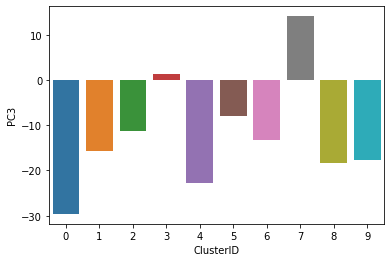

In [128]:
sns.barplot(data=df,x='ClusterID',y='PC3')
plt.show()

In [129]:
##We see that for PC3, only cluster 0 and 9 have positive values, and rest all of them have negative values, which could easily
#mean that this variable represents a variable that is usually negative in the data

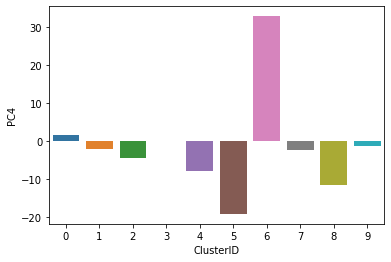

In [130]:
sns.barplot(data=df,x='ClusterID',y='PC4')
plt.show()

In [131]:
##We see that Cluster 6 has the highest mean for the values of PC4, and Cluster 1 has lowest values(negative even so)
#for PC4

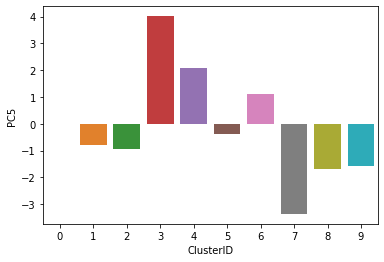

In [132]:
sns.barplot(data=df,x='ClusterID',y='PC5')
plt.show()

In [133]:
##We see that Cluster 8 has the highest mean for the values of PC5, and Cluster 0 has lowest values(negative even so)
#for PC5

# Agglomerative Clustering

In [135]:
pc1.head()

,PC1,PC2,PC3,PC4,PC5
0,-10960.874411,574.044514,25.428534,-6.413696,-12.861913
1,-2110.899674,-1273.574370,-30.354910,-10.956489,-8.523925
2,538.487087,-2665.853472,-9.609720,-17.602667,8.329397
3,10048.104873,147.551919,-16.120162,5.178297,-7.894459
4,8634.710701,-1183.736289,-1.432237,-44.855900,4.881065


In [136]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='complete')

cluster2 = his_clus.fit_predict(pc1)

df_h = pc1.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

2    31
3    19
5    14
0    14
9    10
1     8
7     7
6     4
4     2
8     1
Name: label, dtype: int64

In [137]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='single')

cluster2 = his_clus.fit_predict(pc1)

df_h = pc1.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

2    91
0     7
4     3
1     3
9     1
8     1
7     1
6     1
5     1
3     1
Name: label, dtype: int64

In [138]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')

cluster2 = his_clus.fit_predict(pc1)

df_h = pc1.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

3    28
4    16
1    15
6    14
0    11
5     8
9     7
7     5
2     5
8     1
Name: label, dtype: int64

In [139]:
df_km['ClusterID'].value_counts()

7    25
3    18
0    16
4    14
1     9
9     7
8     7
5     6
2     6
6     2
Name: ClusterID, dtype: int64

In [140]:
##Above we can analyze the spread of the data using visualizations, as well as by using Agglomerative clustering
#we are able to see that which agglomerative method is closest to the original clusters

In [141]:
##We can see that Ward linkage is giving values quite close to our original data

# Cluster Evaluation (Inertia, Silhouette Score)

In [143]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [144]:
kmeans=KMeans(n_clusters=10)

In [145]:
X=pc1

In [146]:
model = kmeans.fit(X=pc1)

In [147]:
y=model.labels_

In [148]:
##Score for Kmeans:
silhouette_score(X,y)

0.4596365544901034

In [149]:
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(X, labels, metric='euclidean'))

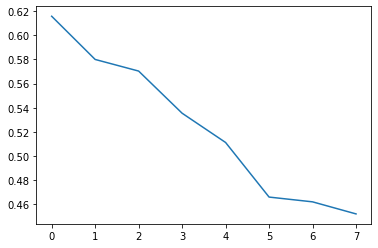

In [150]:
plt.plot(score)

In [151]:
scoredata = pd.DataFrame(score,index=[2,3,4,5,6,7,8,9]).reset_index().rename(columns={0:'value'})

Text(0.5, 1.0, 'Silouette for K-means')

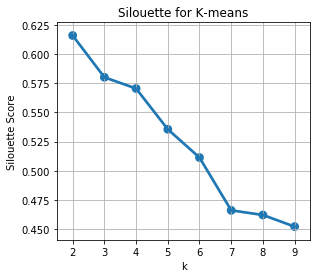

In [152]:

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.pointplot(data=scoredata,x='index',y='value')
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

In [153]:
##Now, let's check Silhouette score for the Agglomerative model:


X=pc1

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')

model = his_clus.fit(pc1)

y=model.labels_

##Score for Agglomerative:
silhouette_score(X,y)

0.4468574866404384

In [154]:
##We can see that the Silhouette score for both Agglomerative and Kmeans is almost same, with that of Kmeans being just
#a little bit higher

In [155]:
##Inertia for Kmeans:


In [156]:


from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(pc1)

In [157]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,550.000000
1,2,412.134974
2,3,343.161893
3,4,294.723961
4,5,258.085186
5,6,226.494862
6,7,206.487266
7,8,185.814234
8,9,172.100600
9,10,154.324917


Text(0, 0.5, 'Cluster Errors')

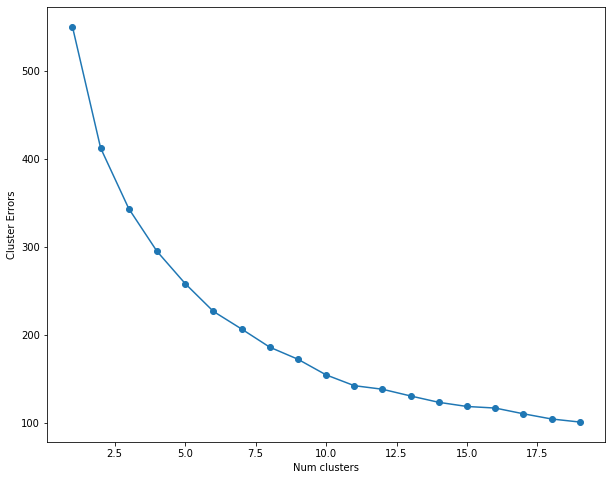

In [158]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [159]:
##Inertia for Agglomerative:

##Plotting


X=pc1

In [160]:

score = []
for n_clusters in range(2,10):
    his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')
    model = his_clus.fit(pc1)
    labels = model.labels_
    score.append(silhouette_score(X, labels, metric='euclidean'))

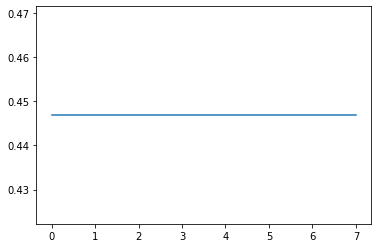

In [161]:
plt.plot(score)

In [162]:
scoredata = pd.DataFrame(score,index=[2,3,4,5,6,7,8,9]).reset_index().rename(columns={0:'value'})

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.pointplot(data=scoredata,x='index',y='value')
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for Agglomerative Clustering")

# Plotting Clusters

In [165]:
##We can scatter clusters based on their correlation: Let's check pairplot first

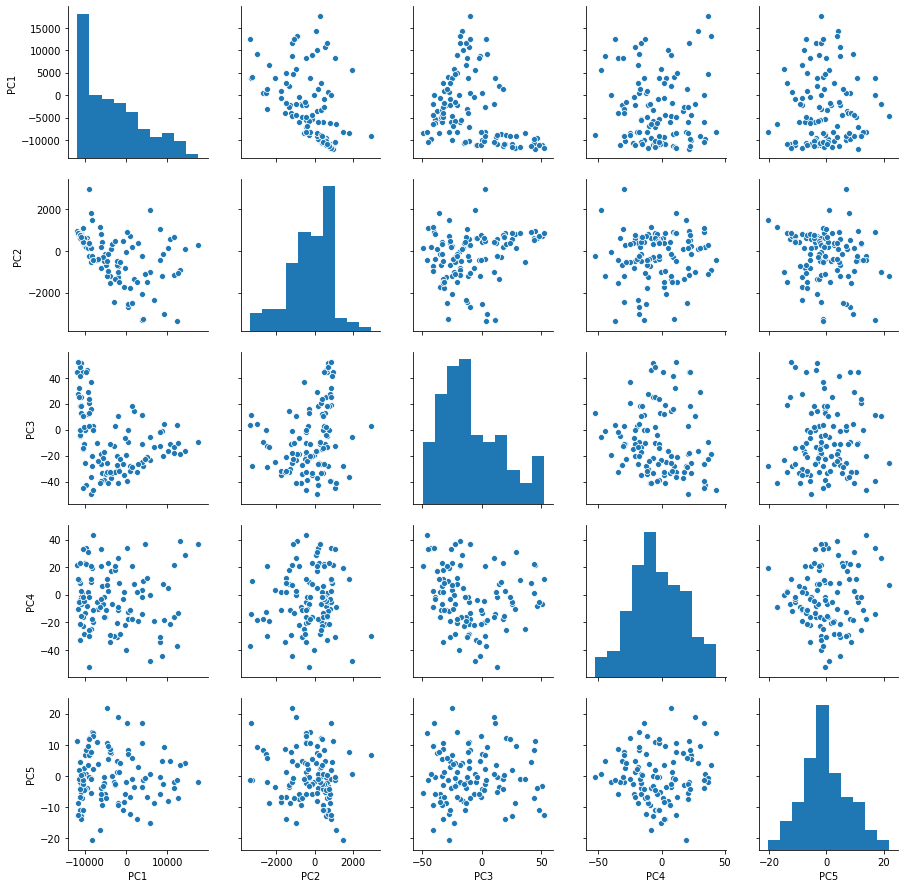

In [166]:
sns.pairplot(data=pc1)
plt.show()

In [167]:
##Above we can see how the PCs are related to each other, and we can easily visualize certain clusters forming
##like between PC3 and PC5 we can see clusters forming
##Since we have fit the model based on all five PCs, we can't plot in five dimensions
##so, we have to look at the relationship and interaction between the PCs. We have checked the correlation plot in another
#question above, and we saw that the PCs are not really correlated.
##So, what we can do it that we can take the mean for Clusters in each PC and plot them to show how the means of each cluster
##vary depending on the attribute (Principal component created)

In [168]:
##Plotting clusters based on mean values of each PC in each cluster

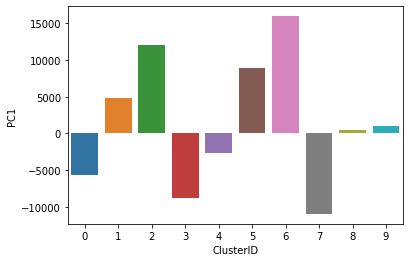

In [169]:
sns.barplot(data=df,x='ClusterID',y='PC1')
plt.show()

In [170]:
##We see that Cluster 6 has the highest mean for the values of PC1, and Cluster 0 has lowest values(negative even so)
#for PC1

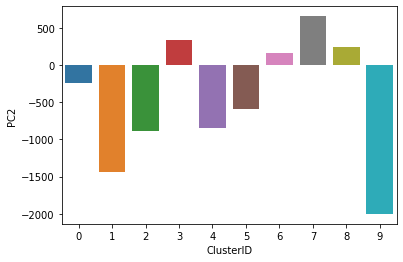

In [171]:
sns.barplot(data=df,x='ClusterID',y='PC2')
plt.show()

In [172]:
##We see that Cluster 1 has the highest mean for the values of PC2, and Cluster 5 has lowest values(negative even so)
#for PC2
##We see that PC2 contains a variable which is ideally negative for a lot of countries in the data

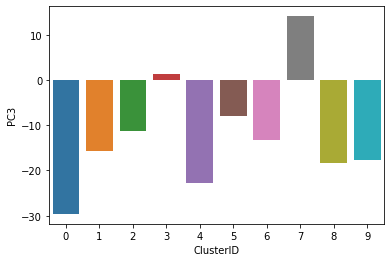

In [173]:
sns.barplot(data=df,x='ClusterID',y='PC3')
plt.show()

In [174]:
##We see that for PC3, only cluster 0 and 9 have positive values, and rest all of them have negative values, which could easily
#mean that this variable represents a variable that is usually negative in the data

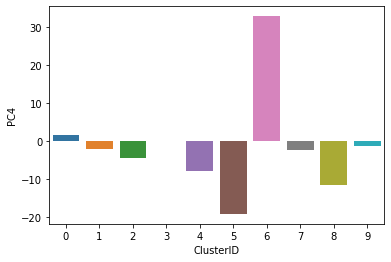

In [175]:
sns.barplot(data=df,x='ClusterID',y='PC4')
plt.show()

In [176]:
##We see that Cluster 6 has the highest mean for the values of PC4, and Cluster 1 has lowest values(negative even so)
#for PC4

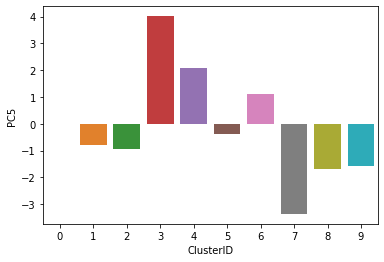

In [177]:
sns.barplot(data=df,x='ClusterID',y='PC5')
plt.show()

In [178]:
##We see that Cluster 8 has the highest mean for the values of PC5, and Cluster 0 has lowest values(negative even so)
#for PC5

# Cluster Analysis

In [180]:
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [181]:
pc1.head()

,PC1,PC2,PC3,PC4,PC5
0,-10960.874411,574.044514,25.428534,-6.413696,-12.861913
1,-2110.899674,-1273.574370,-30.354910,-10.956489,-8.523925
2,538.487087,-2665.853472,-9.609720,-17.602667,8.329397
3,10048.104873,147.551919,-16.120162,5.178297,-7.894459
4,8634.710701,-1183.736289,-1.432237,-44.855900,4.881065


In [182]:
##Kmeans seemed to be the better method: so using Kmeans on df2 to understand how the data looks
##For visualizing the PCs, that has been done above

In [183]:
#For the purpose of understanding with respect to original variables, we will perform ques 4 again with original components
#in data, i.e we are performing without PCA as well
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df2)

In [184]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,1278.000000
1,2,883.050947
2,3,722.823453
3,4,650.009073
4,5,592.635522
5,6,529.494592
6,7,483.550640
7,8,447.877495
8,9,405.684387
9,10,387.278431


Text(0, 0.5, 'Cluster Errors')

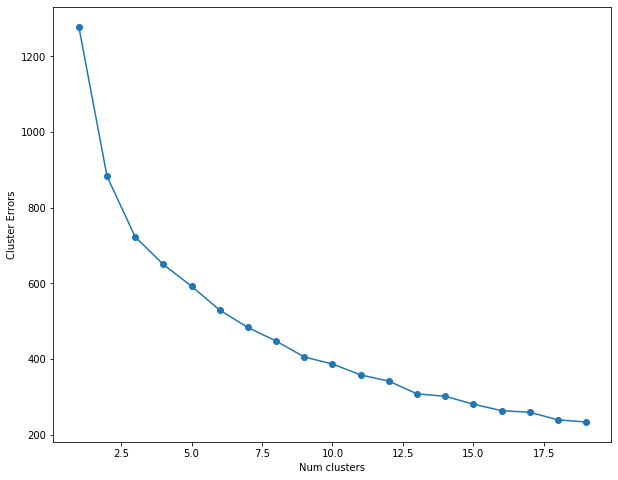

In [185]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [186]:
##We see k = 10 as the optimum number of cluster from the above elbow curve, and now we will fit the model

# Cluster Visualization

In [188]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=10)
Kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [189]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [190]:
Kmean.cluster_centers_

array([[ 8.24039216e+01,  2.59940980e+01,  6.55784314e+00,
         4.52973706e+01,  2.23888235e+03,  8.97460784e+00,
         6.11254902e+01,  4.54333333e+00,  9.82627451e+02],
       [ 1.08352941e+01,  4.85000000e+01,  6.44235294e+00,
         4.71235294e+01,  1.97117647e+04,  7.90117647e+00,
         7.49000000e+01,  1.89058824e+00,  1.20141176e+04],
       [ 4.00000000e+00,  3.69000000e+01,  7.71333333e+00,
         3.90666667e+01,  3.20000000e+04,  1.31333333e+00,
         8.10666667e+01,  1.94000000e+00,  3.07000000e+04],
       [ 2.48809524e+01,  3.79238095e+01,  6.54333333e+00,
         4.36809524e+01,  1.07352381e+04,  5.82761905e+00,
         7.27190476e+01,  2.41809524e+00,  5.07904762e+03],
       [ 3.58521739e+01,  3.90304348e+01,  5.12826087e+00,
         4.84521739e+01,  6.63652174e+03,  1.36865652e+01,
         6.97608696e+01,  3.04956522e+00,  3.06565217e+03],
       [ 1.20000000e+01,  6.16000000e+01,  4.01000000e+00,
         4.17000000e+01,  4.39333333e+04,  1.341333

In [191]:
Kmean.labels_

array([0, 3, 3, 4, 1, 1, 4, 6, 7, 5, 0, 1, 6, 4, 0, 4, 4, 3, 6, 6, 6, 0,
       0, 0, 0, 4, 0, 0, 1, 3, 3, 0, 0, 4, 6, 0, 1, 2, 8, 3, 3, 3, 4, 9,
       0, 1, 4, 6, 0, 4, 0, 8, 3, 4, 0, 0, 4, 0, 1, 0, 4, 6, 3, 2, 4, 3,
       1, 0, 0, 0, 0, 1, 6, 0, 0, 9, 1, 3, 0, 0, 1, 3, 0, 8, 0, 6, 0, 0,
       4, 6, 4, 0, 0, 3, 0, 0, 4, 5, 0, 6, 4, 3, 4, 1, 8, 6, 1, 0, 4, 5,
       0, 3, 1, 0, 9, 8, 0, 3, 8, 2, 4, 3, 0, 6, 0, 0, 3, 0, 0, 4, 3, 1,
       3, 0, 4, 1, 0, 0, 1, 0, 0, 0])

In [192]:
pd.DataFrame(Kmean.labels_)[0].value_counts()  ##Kmeans cluster prediction

0    51
4    23
3    21
1    17
6    14
8     6
9     3
5     3
2     3
7     1
Name: 0, dtype: int64

In [193]:
###Now, let's try agglomerative for full data:

In [194]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='complete')

cluster2 = his_clus.fit_predict(df2)

df_h = df2.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

8    51
2    34
1    23
0    15
4     5
6     4
3     4
7     3
5     2
9     1
Name: label, dtype: int64

In [195]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='single')

cluster2 = his_clus.fit_predict(df2)

df_h = df2.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

1    126
2      5
0      3
3      2
9      1
8      1
7      1
6      1
5      1
4      1
Name: label, dtype: int64

In [196]:
from sklearn.cluster import AgglomerativeClustering

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')

cluster2 = his_clus.fit_predict(df2)

df_h = df2.copy(deep=True)
df_h['label'] = cluster2
df_h['label'].value_counts()

1    51
6    19
0    19
4    15
9    14
7     9
8     5
2     5
5     3
3     2
Name: label, dtype: int64

In [197]:
df_km['ClusterID'].value_counts()

7    25
3    18
0    16
4    14
1     9
9     7
8     7
5     6
2     6
6     2
Name: ClusterID, dtype: int64

In [198]:
##So we see that for the ward linkage of Agglomerative clustering, the predictions are closer to those shown by Kmeans

In [199]:
##To visualize the clusters, we can look at them based on their means and we can also use a dendrogram to visualize them
##We have visualized the means at a later stage in the file.
##Please see dendrogram below

In [200]:

from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

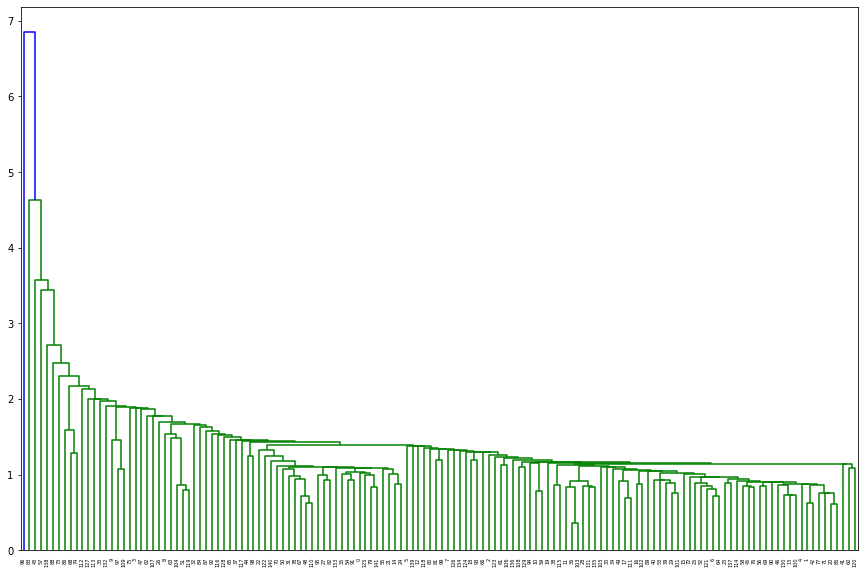

In [201]:
#Hierarchial Clustering: For all the variables, to visualize how the cluster will be formed
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

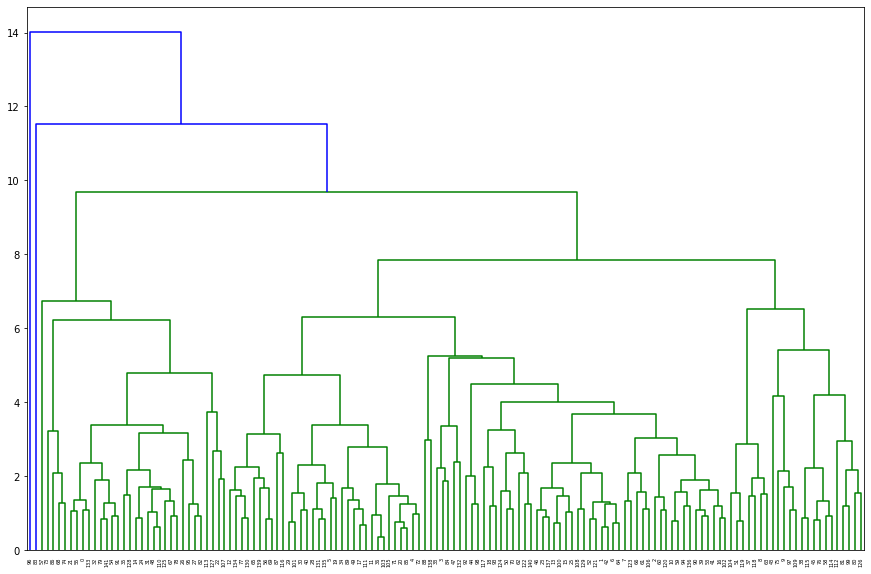

In [202]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

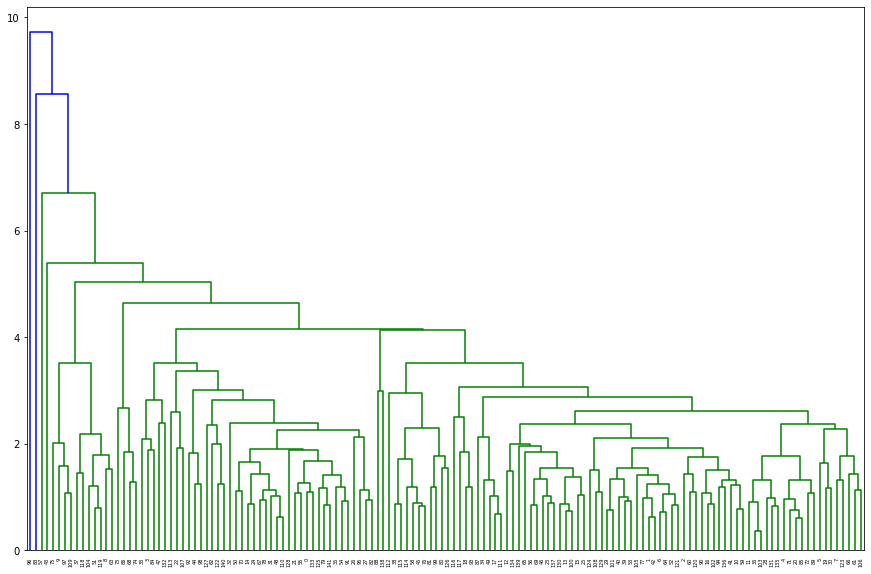

In [203]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

In [204]:
#dedrogram: the longest linkages are seen when there is a good amount of distance between the clusters
#and when they seem to be far apart, and that is what we want
#so, we will go ahead with 10 to 11 clusters as seem from complete linkages
#Complete looks to be the best method since it shows the longer and shorter linkages properly

# Cluster Evaluation - II


In [206]:
##Inertia has been plotted above and it was shown that the optimum number of cluster would be 10 based on the
#elbow curve
##Let's check silhouette score for Kmeans first(for full data---for PCA I have already done the scoring and inertia plotting
##above in the file)

In [207]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [208]:
kmeans=KMeans(n_clusters=10)

In [209]:
X=df2

In [210]:
model = kmeans.fit(X=df2)

In [211]:
y=model.labels_

In [212]:
silhouette_score(X,y)

0.5153704528623214

In [213]:
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(X, labels, metric='euclidean'))

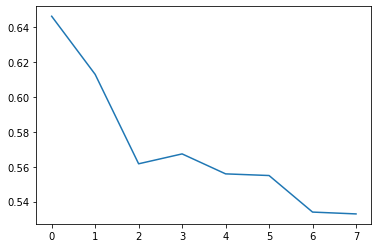

In [214]:
plt.plot(score)

In [215]:
scoredata = pd.DataFrame(score,index=[2,3,4,5,6,7,8,9]).reset_index().rename(columns={0:'value'})

Text(0.5, 1.0, 'Silouette for K-means')

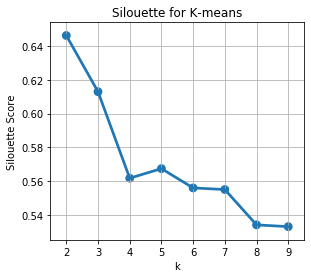

In [216]:
# Set the size of the plot
##Better way to plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.pointplot(data=scoredata,x='index',y='value')
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

In [217]:
##For agglomerative (full data) - score:

In [218]:
##Now, let's check Silhouette score for the Agglomerative model:


X=df2

his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')

model = his_clus.fit(df2)

y=model.labels_

##Score for Agglomerative:
silhouette_score(X,y)

0.4903894001175103

In [219]:
##We see that Silhouette scores for Kmeans and Agglomerative are close by, but again, the score is a bit higher for 
#Kmeans algorithm

In [220]:
##Inertia for Kmeans:

In [221]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df2)

In [222]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,1278.000000
1,2,883.050947
2,3,722.861683
3,4,655.275827
4,5,583.883540
5,6,537.169619
6,7,481.523807
7,8,455.413455
8,9,409.445792
9,10,383.992173


Text(0, 0.5, 'Cluster Errors')

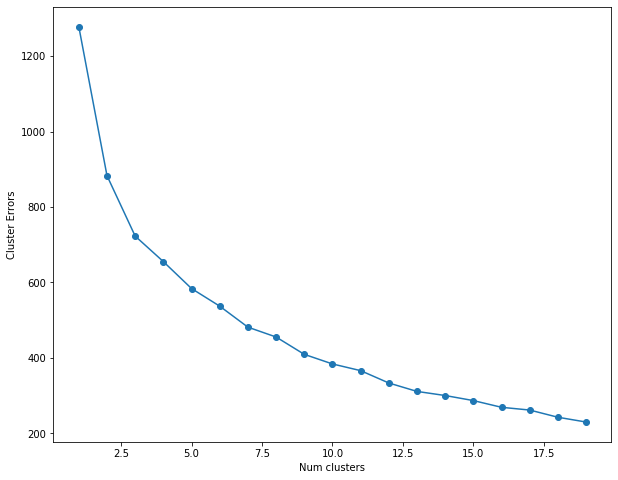

In [223]:
#Elbow plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [224]:
##Inertia for Agglomerative:

##Plotting


X=df2

In [225]:

score = []
for n_clusters in range(2,10):
    his_clus = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')
    model = his_clus.fit(df2)
    labels = model.labels_
    score.append(silhouette_score(X, labels, metric='euclidean'))

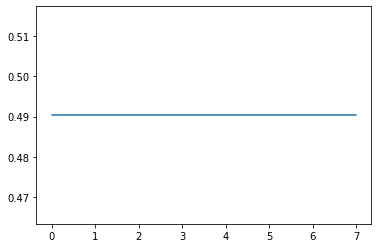

In [226]:
plt.plot(score)

In [227]:
scoredata = pd.DataFrame(score,index=[2,3,4,5,6,7,8,9]).reset_index().rename(columns={0:'value'})

Text(0.5, 1.0, 'Silouette for Agglomerative Clustering')

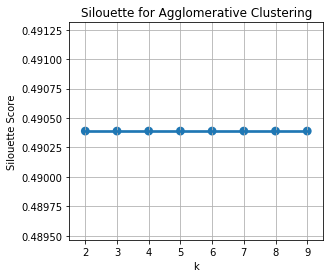

In [228]:

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.pointplot(data=scoredata,x='index',y='value')
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for Agglomerative Clustering")

# Plotting Clusters - II

In [230]:
df2.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [231]:
##Analysis of Clusters:
df2.index = pd.RangeIndex(len(df2.index))
df_km = pd.concat([df2,pd.Series(Kmean.labels_)],axis=1)
df_km.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','Cluster ID']

In [232]:
df_km.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
Cluster ID    0
dtype: int64

In [233]:
df_km

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
137,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
138,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
139,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
140,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [234]:
df2.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Cluster Interpretation - II


In [236]:
km_cluster_1 = pd.DataFrame(df_km.groupby('Cluster ID')['child_mort'].mean())
km_cluster_2 = pd.DataFrame(df_km.groupby('Cluster ID')['exports'].mean())
km_cluster_3 = pd.DataFrame(df_km.groupby('Cluster ID')['health'].mean())
km_cluster_4 = pd.DataFrame(df_km.groupby('Cluster ID')['imports'].mean())
km_cluster_5 = pd.DataFrame(df_km.groupby('Cluster ID')['income'].mean())
km_cluster_6 = pd.DataFrame(df_km.groupby('Cluster ID')['inflation'].mean())
km_cluster_7 = pd.DataFrame(df_km.groupby('Cluster ID')['life_expec'].mean())
km_cluster_8 = pd.DataFrame(df_km.groupby('Cluster ID')['total_fer'].mean())
km_cluster_9 = pd.DataFrame(df_km.groupby('Cluster ID')['gdpp'].mean())

df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8,9]),km_cluster_1,km_cluster_2,km_cluster_3,km_cluster_4,km_cluster_5,km_cluster_6,
               km_cluster_7,km_cluster_8,km_cluster_9],axis=1)
df.columns = ['Cluster ID','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
df  ##Below we can see means

,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,82.403922,25.994098,6.557843,45.297371,2238.882353,8.974608,61.125490,4.543333,982.627451
1,1,10.835294,48.500000,6.442353,47.123529,19711.764706,7.901176,74.900000,1.890588,12014.117647
2,2,4.000000,36.900000,7.713333,39.066667,32000.000000,1.313333,81.066667,1.940000,30700.000000
3,3,24.880952,37.923810,6.543333,43.680952,10735.238095,5.827619,72.719048,2.418095,5079.047619
4,4,35.852174,39.030435,5.128261,48.452174,6636.521739,13.686565,69.760870,3.049565,3065.652174
5,5,12.000000,61.600000,4.010000,41.700000,43933.333333,13.413333,75.733333,2.673333,19766.666667
6,6,22.028571,43.185714,7.035714,43.935714,15335.714286,7.335571,72.421429,2.078571,7706.428571
7,7,13.800000,35.000000,7.890000,43.700000,22900.000000,-0.393000,73.800000,1.860000,28000.000000
8,8,4.216667,64.116667,9.028333,65.683333,28600.000000,0.981500,79.600000,1.423333,22633.333333
9,9,44.866667,75.900000,5.716667,59.600000,29500.000000,13.195000,70.833333,3.016667,15266.666667


# IMPORTANT - Cluster Analyis Based on Original Features


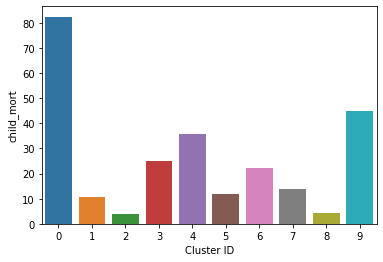

In [238]:
sns.barplot(data=df,x='Cluster ID',y='child_mort')
plt.show()

In [239]:
##Child mortality rate is lowest in Cluster 6 countries  and highest in Cluster 1 countries

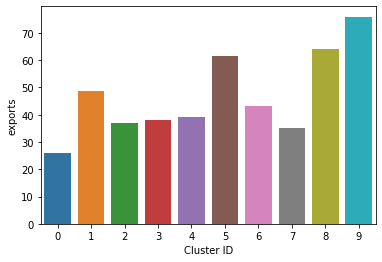

In [240]:
sns.barplot(data=df,x='Cluster ID',y='exports')
plt.show()

In [241]:
##Exports are highest in Cluster 7 countries and lowest in Cluster 1 countries

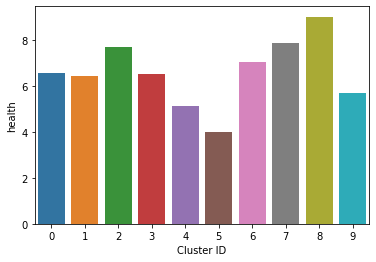

In [242]:
sns.barplot(data=df,x='Cluster ID',y='health')
plt.show()

In [243]:
#Health facilties seem to be the best in CLuster 2 countries and worst in Cluster 4 countries

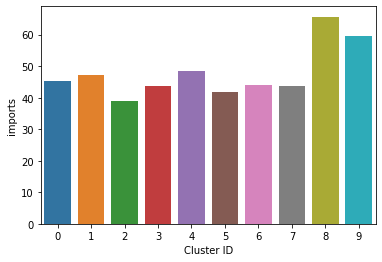

In [244]:
sns.barplot(data=df,x='Cluster ID',y='imports')
plt.show()

In [245]:
##CLuster 2 countries have highest imports and Cluster 9 countries have lowest imports, which can signify that
#cluster 9 countries mostly build and use their own manufactured products

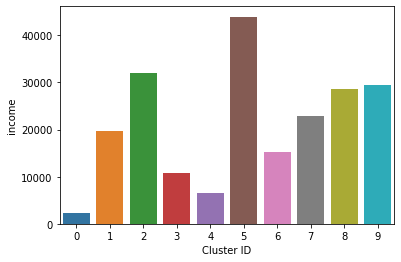

In [246]:
sns.barplot(data=df,x='Cluster ID',y='income')
plt.show()

In [247]:
#In Clsuter 4 countries, incomes are highest and in cluster 1 countries incomes are lowest

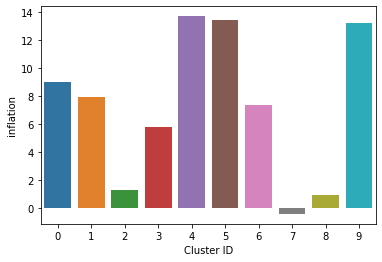

In [248]:
sns.barplot(data=df,x='Cluster ID',y='inflation')
plt.show()

In [249]:
#Cluster 3, 4 and 7 countries have had very high inflation rates, whereas it was lowest for cluster 2 countries

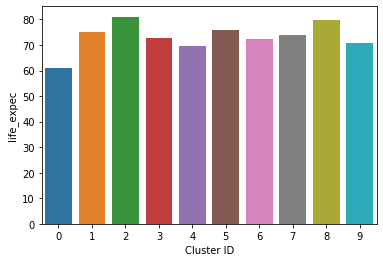

In [250]:
sns.barplot(data=df,x='Cluster ID',y='life_expec')
plt.show()

In [251]:
##Life expectancy is very similar in almost all the countries, but again we can see that it is lowest for countries in Cluster1

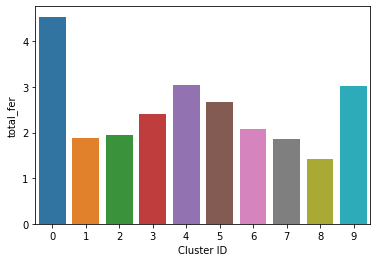

In [252]:
sns.barplot(data=df,x='Cluster ID',y='total_fer')
plt.show()

In [253]:
##Total fer is highest in CLuster1 countries and lowest in Cluster 2 countries

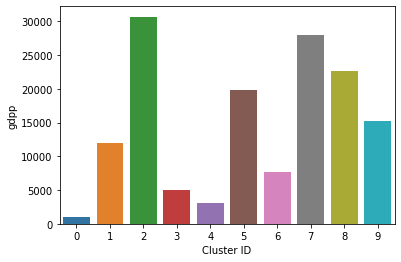

In [254]:
sns.barplot(data=df,x='Cluster ID',y='gdpp')
plt.show()

In [255]:
#GDPP is lowest for cluster 1 countries, and highest for Cluster 6 countries. But cluster 2 countries are also doing 
#Pretty well

# Which countries require aid based on child mortality, income and GDP?

In [257]:
##by looking at the graphs above, we can either say that countries in cluster 5 and 8, or countries in cluster 1 and 3
#are most in need of aid based on the above features, and that is because we will have to take a mean to understand
#which country is in most need. 
#Holistically, few of these countries are weak in one feature, and others weaker in another feature
##So, 1 and 3 are surely in need, but let's move to the next question to find out

In [258]:
#d. Within this set of countries, identify the countries which has to be focused first. (Use mean of the
#above mentioned attributes to arrive at a decision). (2 marks)

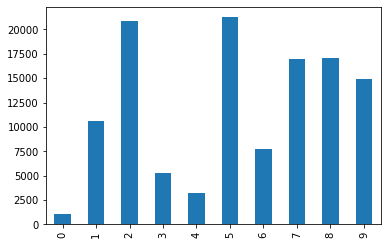

In [259]:
((df['child_mort']+df['income']+df['gdpp'])/3).plot.bar()

In [260]:
##As seen from the plots above, there are various countries which are weak in some of the mentioned characteristics
#and stronger in some other, so if we need to determine it holistically, we will take a mean for these attributes as well
#So, from above we can see that countrie sin Cluster 1 and 3 are in most need of aid based on given situation

##So overall, countries in CLuster 1 are in most need of aid, based on our attributes

# Summary

In [263]:
##Overall fit of the model can be determined through the inertia and the Silhouette score
##We saw that the inertia as shown by the elbow curves was almost the similar in the cases
##So, let's see the Silhouette score for the constructed 4 cases:
##values when recorded
##For agglomerative, I have used ward linkage because it was giving values closer to that of Kmeans, and that would
#aid in our comparison:
##kmeans with PCA:  0.46073464969153494
##kmeans without PCA: 0.518158336390521
##agglomerative with PCA:  0.4468574866404384
##agglomerative without PCA: 0.4903894001175103

In [264]:
#So, we see that highest silhouette sscore is for kmeans without PCA, and lowest is for agglomerative with PCA

In [265]:
##In order to reduce the dimensionality (since in our original data, we had some variables which were highly correlated to
#each other), we can use PCA, and the best model would be kmeans with PCA
##But, in order to understand and visualize our busines problem, we have also constructed model without PCA
##so, if interpretation is our target, then our model must be built on original data
##If reducing overfit and dimensionality is our target, then we can easily use PCA
##In advanced predictio  scenarios, it is highly likely that we will use PCA, but then again we should try to preserve
#as much information as possible

# Interpretations for Business Stakeholders

In [267]:
##Let us first understand how the different features are acting based on Clustered countries

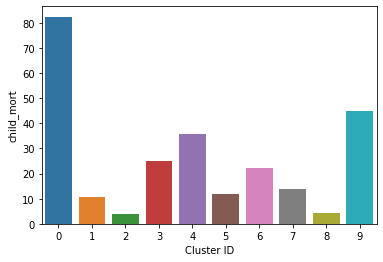

In [268]:
sns.barplot(data=df,x='Cluster ID',y='child_mort')
plt.show()

In [269]:
##Child mortality rate is lowest in Cluster 6 countries  and highest in Cluster 1 countries

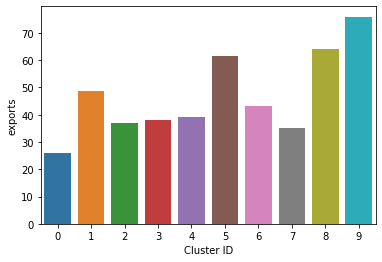

In [270]:
sns.barplot(data=df,x='Cluster ID',y='exports')
plt.show()

In [271]:
##Exports are highest in Cluster 7 countries and lowest in Cluster 1 countries

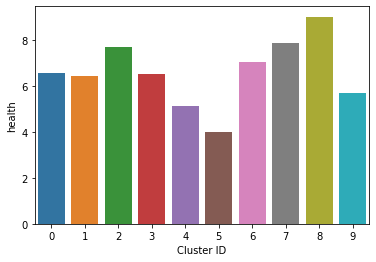

In [272]:
sns.barplot(data=df,x='Cluster ID',y='health')
plt.show()

In [273]:
#Health facilties seem to be the best in CLuster 2 countries and worst in Cluster 4 countries

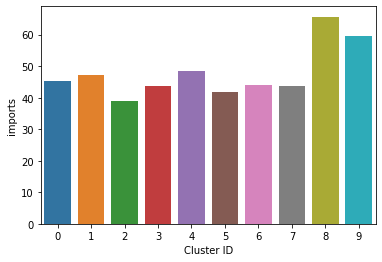

In [274]:
sns.barplot(data=df,x='Cluster ID',y='imports')
plt.show()

In [275]:
##CLuster 2 countries have highest imports and Cluster 9 countries have lowest imports, which can signify that
#cluster 9 countries mostly build and use their own manufactured products

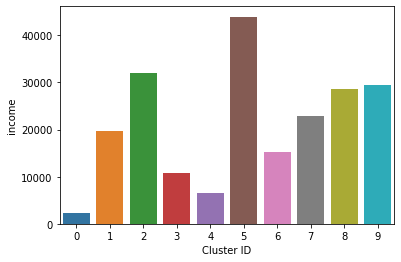

In [276]:
sns.barplot(data=df,x='Cluster ID',y='income')
plt.show()

In [277]:
#In Clsuter 4 countries, incomes are highest and in cluster 1 countries incomes are lowest

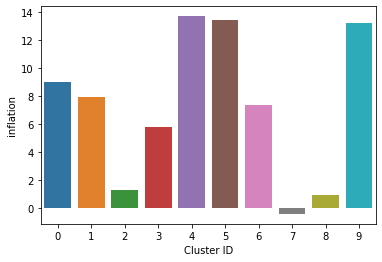

In [278]:
sns.barplot(data=df,x='Cluster ID',y='inflation')
plt.show()

In [279]:
#Cluster 3, 4 and 7 countries have had very high inflation rates, whereas it was lowest for cluster 2 countries

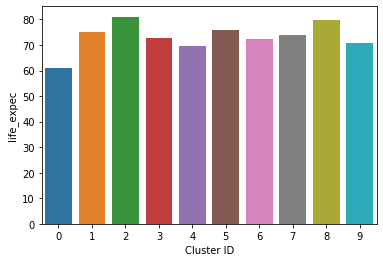

In [280]:
sns.barplot(data=df,x='Cluster ID',y='life_expec')
plt.show()

In [281]:
##Life expectancy is very similar in almost all the countries, but again we can see that it is lowest for countries in Cluster1

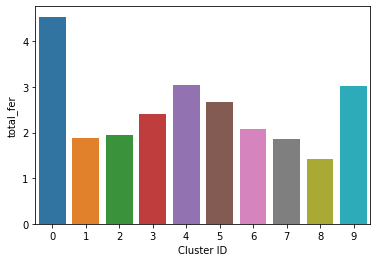

In [282]:
sns.barplot(data=df,x='Cluster ID',y='total_fer')
plt.show()

In [283]:
##Total fer is highest in CLuster1 countries and lowest in Cluster 2 countries

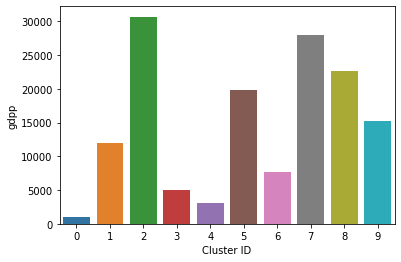

In [284]:
sns.barplot(data=df,x='Cluster ID',y='gdpp')
plt.show()

In [285]:
#GDPP is lowest for cluster 1 countries, and highest for Cluster 6 countries. But cluster 2 countries are also doing 
#Pretty well

In [289]:
##Now, we can take a mean of all the attributes and then try again:

df.columns

Index(['Cluster ID', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [292]:
(df['child_mort']+ df['exports']+df['health']+df['imports']+ df['income']+ df['inflation']+ df['life_expec']+ df['total_fer']+ df['gdpp'])/9

0     384.045163
1    3547.052810
2    6985.777778
3    1778.697725
4    1101.903773
5    7101.236667
6    2582.240460
7    5675.073000
8    5717.598130
9    5004.421667
dtype: float64

In [ ]:
##If equal weightage is given to all the attributes in our dataframe, then countries in Cluster 0,3,4,6 need to be
#focussed on first, because the average of our attributes is very weak in these countries, as compared to the
#countries in other Clusters.
##And most of all, Countries in Cluster 0 are in need of heavy aid, because they seem to be extremely weaker
#than all the other countries, but it could be that one attribute brought them down to this stage
##But then again, since we are considering the importance of all the attributes, it is highly likely that this country does
##require aid in many terms
##From the plots we can see that gdpp, income and exports are weak in this country--similary we can find out for other countries
#as well

# End Notes

In [288]:
##The following could be the key risks to my interpretation:

#1. I have focussed on establishing that a better model could be the one which has a better interpretability, but then again
##in some business scenario, interpreatbilty could be less important than clustering the data in a more refined way
#2. PCA could be the better way of making the correct clusters, but PCA would not help us much in interpretabilty unless
#we understand what the components really represent.
#3. Another risk could be that we haven't actually make predictions using Classification models, and we have formed the Clusters
##based on unsupervised algorithms, but then again, that is the industry requirement these days, so in such a
#case Inertia and 
#silhouette scores are the only metrics for understanding which model is better